#### Psy

In [1]:
import pandas as pd
url="https://bd29ee0e-54ab-4daa-9671-d153865d1620.usrfiles.com/ugd/bd29ee_f735ab682b42424dab0f0e98a36f5d5f.csv"
df=pd.read_csv(url)
df.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1


In [2]:
X=df[["CONTENT"]]
y=df[["CLASS"]]

In [3]:
X_list=X.CONTENT.tolist()

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X_list)

In [5]:
X=pd.DataFrame(X.toarray())
X.head()

,0,1,2,3,4,5,6,7,8,9,...,1408,1409,1410,1411,1412,1413,1414,1415,1416,1417
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
import numpy as np
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# feature extraction. We are going to output the selection scores for all features and select the features with the highest scores.
test = SelectKBest(score_func=f_classif, k="all")
fit = test.fit(X, np.asarray(y).reshape(y.shape[0],))
features = fit.transform(X)
# summarize scores
set_printoptions(precision=3)

scores=fit.scores_
scores=pd.DataFrame(scores)
scores=scores.rename(columns={0:"scores"})
scores=scores.sort_values(by=["scores"],ascending=False)
scores

,scores
336,71.708627
1308,64.577320
306,56.681818
870,49.398787
1223,38.445246
...,...
1130,0.000000
645,0.000000
467,0.000000
574,0.000000


In [7]:
scores1=scores[scores["scores"]>0]
scores1

,scores
336,71.708627
1308,64.577320
306,56.681818
870,49.398787
1223,38.445246
...,...
280,0.077887
1338,0.075260
853,0.068504
894,0.045265


In [8]:
X_scores=scores1[scores1["scores"]>=10]
len(X_scores)

27

In [9]:
X_prime=X.iloc[:,X_scores.index]
X_prime.head()

,336,1308,306,870,1223,968,1164,245,651,1386,...,687,599,495,181,648,1215,765,632,529,856
0,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,1,2,1,0,0,0,...,1,1,0,2,0,0,1,1,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
X_prime.shape

(350, 27)

In [11]:
y.groupby("CLASS")["CLASS"].count()

CLASS
0    175
1    175
Name: CLASS, dtype: int64

In [12]:
X_scores=scores1[scores1["scores"]>=11]
len(X_scores)

24

In [13]:
X_prime=X.iloc[:,X_scores.index]

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_prime,y,test_size=0.3,random_state=0)
print(X_train.shape)
print(X_test.shape)

(245, 24)
(105, 24)


In [15]:
from sklearn import svm
SVML=svm.SVC(kernel="linear",
            random_state=0).fit(X_train,np.asarray(y_train).reshape(y_train.shape[0],))
SVML

SVC(kernel='linear', random_state=0)

In [16]:
from sklearn.metrics import accuracy_score
train_pred=SVML.predict(X_train)
test_pred=SVML.predict(X_test)
print("Accuracy score for train data: ",accuracy_score(y_train,train_pred))
print("Accuracy score for test data: ",accuracy_score(y_test,test_pred))

Accuracy score for train data:  0.9591836734693877
Accuracy score for test data:  0.9809523809523809


In [17]:
from sklearn.metrics import roc_auc_score
print("ROC_AUC for train data: ",roc_auc_score(y_train,train_pred))
print("ROC_AUC for test data: ",roc_auc_score(y_test,test_pred))

ROC_AUC for train data:  0.9603715584068431
ROC_AUC for test data:  0.983050847457627


In [18]:
from sklearn.metrics import confusion_matrix
print("Confusion matrix for test data: \n",confusion_matrix(y_test,test_pred))

Confusion matrix for test data: 
 [[57  2]
 [ 0 46]]


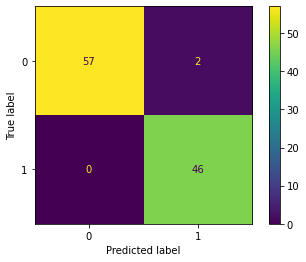

In [19]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
plot_confusion_matrix(SVML,X_test,y_test)
plt.show()

In [20]:
y_test.groupby("CLASS")["CLASS"].count()

CLASS
0    59
1    46
Name: CLASS, dtype: int64

In [22]:
print("Scam caught rate for test data: ",46/46)
print("Ham blocked rate for test data: ",2/59)
from sklearn.metrics import matthews_corrcoef
print("Mathew correlation coefficient for test data: ",matthews_corrcoef(y_test,test_pred))
from sklearn.metrics import f1_score
print("F1 score for test data: ",f1_score(y_test,test_pred))

Scam caught rate for test data:  1.0
Ham blocked rate for test data:  0.03389830508474576
Mathew correlation coefficient for test data:  0.9622096744614027
F1 score for test data:  0.9787234042553191


In [23]:
SVMR=svm.SVC(kernel="rbf",gamma="auto",
            random_state=0).fit(X_train,np.asarray(y_train).reshape(y_train.shape[0],))
SVMR

SVC(gamma='auto', random_state=0)

In [24]:
train_pred=SVMR.predict(X_train)
test_pred=SVMR.predict(X_test)
print("Accuracy score for train data: ",accuracy_score(y_train,train_pred))
print("Accuracy score for test data: ",accuracy_score(y_test,test_pred))

Accuracy score for train data:  0.9428571428571428
Accuracy score for test data:  0.9714285714285714


In [25]:
print("ROC_AUC for train data: ",roc_auc_score(y_train,train_pred))
print("ROC_AUC for test data: ",roc_auc_score(y_test,test_pred))

ROC_AUC for train data:  0.9448676824378507
ROC_AUC for test data:  0.9721812822402358


In [26]:
print("Confusion matrix for test data: \n",confusion_matrix(y_test,test_pred))

Confusion matrix for test data: 
 [[57  2]
 [ 1 45]]


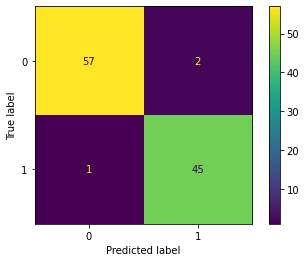

In [27]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
plot_confusion_matrix(SVMR,X_test,y_test)
plt.show()

In [28]:
print("Scam blocked rate for test data: ",45/46)
print("Ham blocked rate for test data: ",2/57)
print("Mathew correlation coefficient for test data: ",matthews_corrcoef(y_test,test_pred))
print("F1 score for test data: ",f1_score(y_test,test_pred))

Scam blocked rate for test data:  0.9782608695652174
Ham blocked rate for test data:  0.03508771929824561
Mathew correlation coefficient for test data:  0.9422817042997553
F1 score for test data:  0.967741935483871


In [29]:
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.ensemble import GradientBoostingClassifier
#from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
#from sklearn.naive_bayes import BernoulliNB
#from sklearn.naive_bayes import MultinomialNB
Gaussian=GaussianNB().fit(X_train,np.asarray(y_train).reshape(y_train.shape[0],))
Gaussian

GaussianNB()

In [30]:
train_pred=Gaussian.predict(X_train)
test_pred=Gaussian.predict(X_test)
print("Accuracy score for train data: ",accuracy_score(y_train,train_pred))
print("Accuracy score for test data: ",accuracy_score(y_test,test_pred))

Accuracy score for train data:  0.889795918367347
Accuracy score for test data:  0.9809523809523809


In [31]:
print("Confusion matrix for test data: \n",confusion_matrix(y_test,test_pred))

Confusion matrix for test data: 
 [[58  1]
 [ 1 45]]


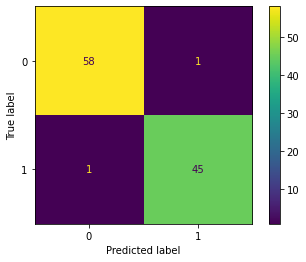

In [32]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
plot_confusion_matrix(Gaussian,X_test,y_test)
plt.show()

In [33]:
print("Scam blocked rate for test data: ",45/46)
print("Ham blocked rate for test data: ",1/58)
print("Mathew correlation coefficient for test data: ",matthews_corrcoef(y_test,test_pred))
print("F1 score for test data: ",f1_score(y_test,test_pred))

Scam blocked rate for test data:  0.9782608695652174
Ham blocked rate for test data:  0.017241379310344827
Mathew correlation coefficient for test data:  0.9613117170228445
F1 score for test data:  0.9782608695652174


#### KatyPerry

In [34]:
url="https://bd29ee0e-54ab-4daa-9671-d153865d1620.usrfiles.com/ugd/bd29ee_b3759c63e5334da099e677899d9ea30e.csv"
df=pd.read_csv(url)
df.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,z12pgdhovmrktzm3i23es5d5junftft3f,lekanaVEVO1,2014-07-22T15:27:50,i love this so much. AND also I Generate Free ...,1
1,z13yx345uxepetggz04ci5rjcxeohzlrtf4,Pyunghee,2014-07-27T01:57:16,http://www.billboard.com/articles/columns/pop-...,1
2,z12lsjvi3wa5x1vwh04cibeaqnzrevxajw00k,Erica Ross,2014-07-27T02:51:43,Hey guys! Please join me in my fight to help a...,1
3,z13jcjuovxbwfr0ge04cev2ipsjdfdurwck,Aviel Haimov,2014-08-01T12:27:48,http://psnboss.com/?ref=2tGgp3pV6L this is the...,1
4,z13qybua2yfydzxzj04cgfpqdt2syfx53ms0k,John Bello,2014-08-01T21:04:03,Hey everyone. Watch this trailer!!!!!!!! http...,1


In [35]:
X=df[["CONTENT"]]
y=df[["CLASS"]]

In [36]:
X_list=X.CONTENT.tolist()

In [37]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X_list)

X=pd.DataFrame(X.toarray())
X.head()

,0,1,2,3,4,5,6,7,8,9,...,1728,1729,1730,1731,1732,1733,1734,1735,1736,1737
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
import numpy as np
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# feature extraction. We are going to output the selection scores for all features and select the features with the highest scores.
test = SelectKBest(score_func=f_classif, k="all")
fit = test.fit(X, np.asarray(y).reshape(y.shape[0],))
features = fit.transform(X)
# summarize scores
set_printoptions(precision=3)

scores=fit.scores_
scores=pd.DataFrame(scores)
scores=scores.rename(columns={0:"scores"})
scores=scores.sort_values(by=["scores"],ascending=False)
scores

,scores
393,128.220094
1710,70.138789
815,53.389645
814,41.022584
372,37.709699
...,...
958,0.000000
1166,0.000000
349,0.000000
807,0.000000


In [39]:
scores1=scores[scores["scores"]>0]
scores1

,scores
393,128.220094
1710,70.138789
815,53.389645
814,41.022584
372,37.709699
...,...
940,0.069281
244,0.067863
299,0.052984
968,0.034269


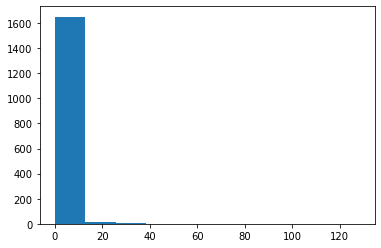

In [40]:
import matplotlib.pyplot as plt
plt.hist(scores1)
plt.show()

In [41]:
X_scores=scores1[scores1["scores"]>=12]
len(X_scores)

18

In [42]:
X_prime=X.iloc[:,X_scores.index]

In [43]:
y.groupby("CLASS")["CLASS"].count()

CLASS
0    175
1    175
Name: CLASS, dtype: int64

In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_prime,y,test_size=0.25,random_state=0)
print(X_train.shape)
print(X_test.shape)

(262, 18)
(88, 18)


In [45]:
from sklearn.ensemble import RandomForestClassifier
Forest=RandomForestClassifier(
                              random_state=0).fit(X_train,np.asarray(y_train).reshape(y_train.shape[0],))
Forest

RandomForestClassifier(random_state=0)

In [46]:
from sklearn.metrics import accuracy_score
train_pred=Forest.predict(X_train)
test_pred=Forest.predict(X_test)
print("Accuracy score for train data: ",accuracy_score(y_train,train_pred))
print("Accuracy score for test data: ",accuracy_score(y_test,test_pred))

Accuracy score for train data:  0.9580152671755725
Accuracy score for test data:  0.9545454545454546


In [47]:
from sklearn.metrics import roc_auc_score
print("ROC_AUC for train data: ",roc_auc_score(y_train,train_pred))
print("ROC_AUC for test data: ",roc_auc_score(y_test,test_pred))

ROC_AUC for train data:  0.9580152671755725
ROC_AUC for test data:  0.9545454545454545


In [48]:
from sklearn.metrics import confusion_matrix
print("Confusion matrix for test data: \n",confusion_matrix(y_test,test_pred))

Confusion matrix for test data: 
 [[43  1]
 [ 3 41]]


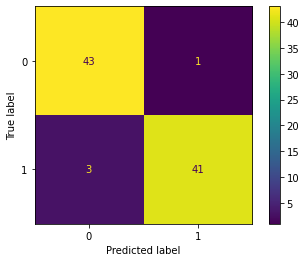

In [49]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
plot_confusion_matrix(Forest,X_test,y_test)
plt.show()

In [50]:
y_test.groupby("CLASS")["CLASS"].count()

CLASS
0    44
1    44
Name: CLASS, dtype: int64

In [51]:
print("Scam blocked rate for test data: ",41/44)
print("Ham blocked rate for test data: ",1/44)
from sklearn.metrics import matthews_corrcoef
print("Mathew correlation coefficient for test data: ",matthews_corrcoef(y_test,test_pred))
print("F1 score for test data: ",f1_score(y_test,test_pred))

Scam blocked rate for test data:  0.9318181818181818
Ham blocked rate for test data:  0.022727272727272728
Mathew correlation coefficient for test data:  0.9100315103865801
F1 score for test data:  0.9534883720930233


In [52]:
from sklearn import svm
SVM=svm.SVC(C=2,random_state=0).fit(X_train,np.asarray(y_train).reshape(y_train.shape[0],))
SVM

SVC(C=2, random_state=0)

In [53]:
train_pred=SVM.predict(X_train)
test_pred=SVM.predict(X_test)
print("Accuracy score for train data: ",accuracy_score(y_train,train_pred))
print("Accuracy score for test data: ",accuracy_score(y_test,test_pred))

Accuracy score for train data:  0.9541984732824428
Accuracy score for test data:  0.9545454545454546


In [54]:
print("Confusion matrix for test data: \n",confusion_matrix(y_test,test_pred))

Confusion matrix for test data: 
 [[44  0]
 [ 4 40]]


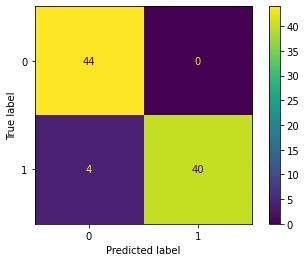

In [55]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
plot_confusion_matrix(SVM,X_test,y_test)
plt.show()

In [58]:
print("Scam blocked rate for test data: ",40/44)
print("Ham blocked rate for test data: ",0/44)
print("Mathew correlation coefficient for test data: ",matthews_corrcoef(y_test,test_pred))
print("F1 score for test data: ",f1_score(y_test,test_pred))

Scam blocked rate for test data:  0.9090909090909091
Ham blocked rate for test data:  0.0
Mathew correlation coefficient for test data:  0.9128709291752768
F1 score for test data:  0.9523809523809523


In [57]:
pip install imbalanced-learn

     |████████████████████████████████| 167 kB 4.2 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


### LMFAO

In [59]:
import pandas as pd
url="https://bd29ee0e-54ab-4daa-9671-d153865d1620.usrfiles.com/ugd/bd29ee_fd20dd0a70d346fd945d987fa3c18e76.csv"
df=pd.read_csv(url)
df.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,z13uwn2heqndtr5g304ccv5j5kqqzxjadmc0k,Corey Wilson,2015-05-28T21:39:52.376000,"<a href=""http://www.youtube.com/watch?v=KQ6zr6...",0
1,z124jvczaz3dxhnbc04cffk43oiugj25yzo0k,Epic Gaming,2015-05-28T20:07:20.610000,wierd but funny﻿,0
2,z13tczjy5xj0vjmu5231unho1ofey5zdk,LaS Music,2015-05-28T19:23:35.355000,"Hey guys, I&#39;m a human.<br /><br /><br />Bu...",1
3,z13tzr0hdpnayhqqc04cd3zqqqjkf3ngckk0k,Cheryl Fox,2015-05-28T17:49:35.294000,Party Rock....lol...who wants to shuffle!!!﻿,0
4,z12pcvix4zedcjvyb04ccr1r0mr2g5xwyng0k,PATRICK_TW,2015-05-28T16:28:26.818000,Party rock﻿,0


In [60]:
df.shape

(438, 5)

In [61]:
X=df[["CONTENT"]]
y=df[["CLASS"]]

In [62]:
X_list=X.CONTENT.tolist()

In [63]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X_list)

X=pd.DataFrame(X.toarray())
X.head()

,0,1,2,3,4,5,6,7,8,9,...,947,948,949,950,951,952,953,954,955,956
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
import numpy as np
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# feature extraction. We are going to output the selection scores for all features and select the features with the highest scores.
test = SelectKBest(score_func=f_classif, k="all")
fit = test.fit(X, np.asarray(y).reshape(y.shape[0],))
features = fit.transform(X)
# summarize scores
set_printoptions(precision=3)

scores=fit.scores_
scores=pd.DataFrame(scores)
scores=scores.rename(columns={0:"scores"})
scores=scores.sort_values(by=["scores"],ascending=False)
scores

,scores
173,309.183876
606,277.558645
595,197.121642
952,180.850488
879,119.326568
...,...
918,0.012125
291,0.012125
108,0.010319
898,0.008410


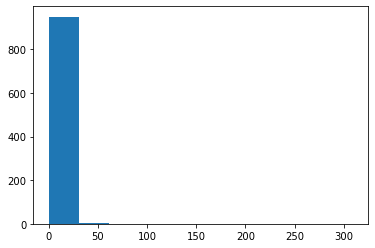

In [65]:
import matplotlib.pyplot as plt
plt.hist(scores)
plt.show()

In [66]:
X_scores=scores[scores["scores"]>=8]
len(X_scores)

28

In [67]:
X_prime=X.iloc[:,X_scores.index]

In [68]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_prime=pd.DataFrame(scaler.fit_transform(X_prime))
X_prime.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0.0,0.000000,0.000000,0.25,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,0.0,0.000000,0.000000,0.00,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,1.0,0.333333,0.333333,0.00,0.0,0.333333,0.0,0.5,0.0,0.0,...,0.0,0.0,0.333333,0.0,0.8,0.0,0.0,0.0,0.333333,0.0
3,0.0,0.000000,0.000000,0.00,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.5,0.0,0.000000,0.0,0.2,0.0,0.0,0.0,0.000000,1.0
4,0.0,0.000000,0.000000,0.00,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.5,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [69]:
y.groupby("CLASS")["CLASS"].count()

CLASS
0    202
1    236
Name: CLASS, dtype: int64

In [70]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_prime,y,test_size=0.34,random_state=0)
print(X_train.shape)
print(X_test.shape)

(289, 28)
(149, 28)


In [71]:
from imblearn.ensemble import BalancedRandomForestClassifier
BForest=BalancedRandomForestClassifier(sampling_strategy="not majority",n_jobs=-1,
                                       random_state=0).fit(X_train,np.asarray(y_train).reshape(y_train.shape[0],))
BForest

BalancedRandomForestClassifier(n_jobs=-1, random_state=0,
                               sampling_strategy='not majority')

In [72]:
train_pred=BForest.predict(X_train)
test_pred=BForest.predict(X_test)
print("Accuracy score for train data: ",accuracy_score(y_train,train_pred))
print("Accuracy score for test data: ",accuracy_score(y_test,test_pred))

Accuracy score for train data:  0.9826989619377162
Accuracy score for test data:  0.9731543624161074


In [73]:
from sklearn.metrics import roc_auc_score
print("ROC_AUC for train data: ",roc_auc_score(y_train,train_pred))
print("ROC_AUC for test data: ",roc_auc_score(y_test,test_pred))

ROC_AUC for train data:  0.9838709677419355
ROC_AUC for test data:  0.9741285403050108


In [74]:
from sklearn.metrics import confusion_matrix
print("Confusion matrix for test data: \n",confusion_matrix(y_test,test_pred))

Confusion matrix for test data: 
 [[67  1]
 [ 3 78]]


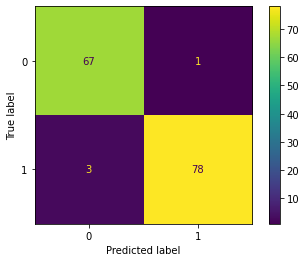

In [75]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
plot_confusion_matrix(BForest,X_test,y_test)
plt.show()

In [76]:
print("Scam blocked rate for test data: ",78/(78+3))
print("Ham blocked rate for test data: ",1/68)
from sklearn.metrics import matthews_corrcoef
print("Mathew correlation coefficient for test data: ",matthews_corrcoef(y_test,test_pred))
from sklearn.metrics import f1_score
print("F1 score for test data: ",f1_score(y_test,test_pred))

Scam blocked rate for test data:  0.9629629629629629
Ham blocked rate for test data:  0.014705882352941176
Mathew correlation coefficient for test data:  0.9463689752184842
F1 score for test data:  0.975


In [77]:
#from sklearn.naive_bayes import BernoulliNB
from sklearn import svm
SVML=svm.SVC(kernel="linear",
            random_state=0).fit(X_train,np.asarray(y_train).reshape(y_train.shape[0],))
SVML

SVC(kernel='linear', random_state=0)

In [78]:
from sklearn.metrics import accuracy_score
train_pred=SVML.predict(X_train)
test_pred=SVML.predict(X_test)
print("Accuracy score for train data: ",accuracy_score(y_train,train_pred))
print("Accuracy score for test data: ",accuracy_score(y_test,test_pred))

Accuracy score for train data:  0.9446366782006921
Accuracy score for test data:  0.9731543624161074


In [79]:
print("ROC_AUC for train data: ",roc_auc_score(y_train,train_pred))
print("ROC_AUC for test data: ",roc_auc_score(y_test,test_pred))

ROC_AUC for train data:  0.9478815599422244
ROC_AUC for test data:  0.9741285403050108


In [80]:
print("Confusion matrix for test data: \n",confusion_matrix(y_test,test_pred))

Confusion matrix for test data: 
 [[67  1]
 [ 3 78]]


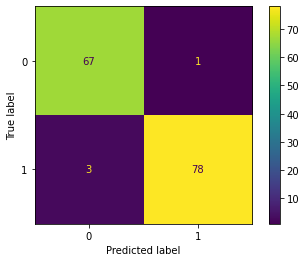

In [81]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
plot_confusion_matrix(SVML,X_test,y_test)
plt.show()

In [82]:
print("Scam blocked rate for test data: ",78/81)
print("Ham blocked rate for test data: ",1/68)
print("Mathew correlation coefficient for test data: ",matthews_corrcoef(y_test,test_pred))
print("F1 score for test data: ",f1_score(y_test,test_pred))

Scam blocked rate for test data:  0.9629629629629629
Ham blocked rate for test data:  0.014705882352941176
Mathew correlation coefficient for test data:  0.9463689752184842
F1 score for test data:  0.975


In [83]:
from sklearn.naive_bayes import GaussianNB
Gaussian=GaussianNB().fit(X_train,np.asarray(y_train).reshape(y_train.shape[0],))
Gaussian

GaussianNB()

In [84]:
train_pred=Gaussian.predict(X_train)
test_pred=Gaussian.predict(X_test)
print("Accuracy score for train data: ",accuracy_score(y_train,train_pred))
print("Accuracy score for test data: ",accuracy_score(y_test,test_pred))

Accuracy score for train data:  0.9584775086505191
Accuracy score for test data:  0.9731543624161074


In [85]:
print("ROC_AUC for train data: ",roc_auc_score(y_train,train_pred))
print("ROC_AUC for test data: ",roc_auc_score(y_test,test_pred))

ROC_AUC for train data:  0.9612903225806452
ROC_AUC for test data:  0.9753086419753086


In [86]:
print("Confusion matrix for test data: \n",confusion_matrix(y_test,test_pred))

Confusion matrix for test data: 
 [[68  0]
 [ 4 77]]


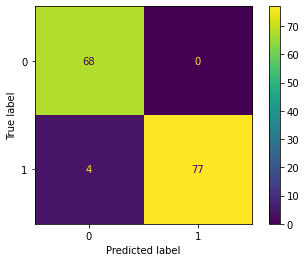

In [87]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
plot_confusion_matrix(Gaussian,X_test,y_test)
plt.show()

In [88]:
print("Scam blocked rate for test data: ",77/81)
print("Ham blocked rate for test data: ",0/68)
print("Mathew correlation coefficient for test data: ",matthews_corrcoef(y_test,test_pred))
print("F1 score for test data: ",f1_score(y_test,test_pred))

Scam blocked rate for test data:  0.9506172839506173
Ham blocked rate for test data:  0.0
Mathew correlation coefficient for test data:  0.9475258374419283
F1 score for test data:  0.9746835443037974


#### Eminem

In [89]:
url="https://bd29ee0e-54ab-4daa-9671-d153865d1620.usrfiles.com/ugd/bd29ee_af05b6923f5d4fea831b3862efa89cd4.csv"
df=pd.read_csv(url)
df.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,z12rwfnyyrbsefonb232i5ehdxzkjzjs2,Lisa Wellas,NaN,+447935454150 lovely girl talk to me xxx﻿,1
1,z130wpnwwnyuetxcn23xf5k5ynmkdpjrj04,jason graham,2015-05-29T02:26:10.652000,I always end up coming back to this song<br />﻿,0
2,z13vsfqirtavjvu0t22ezrgzyorwxhpf3,Ajkal Khan,NaN,"my sister just received over 6,500 new <a rel=...",1
3,z12wjzc4eprnvja4304cgbbizuved35wxcs,Dakota Taylor,2015-05-29T02:13:07.810000,Cool﻿,0
4,z13xjfr42z3uxdz2223gx5rrzs3dt5hna,Jihad Naser,NaN,Hello I&#39;am from Palastine﻿,1


In [90]:
df.shape

(448, 5)

In [91]:
X=df[["CONTENT"]]
y=df[["CLASS"]]

In [92]:
X_list=X.CONTENT.tolist()

In [93]:

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X_list)

X=pd.DataFrame(X.toarray())
X.head()

,0,1,2,3,4,5,6,7,8,9,...,1592,1593,1594,1595,1596,1597,1598,1599,1600,1601
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [94]:
import numpy as np
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# feature extraction. We are going to output the selection scores for all features and select the features with the highest scores.
test = SelectKBest(score_func=f_classif, k="all")
fit = test.fit(X, np.asarray(y).reshape(y.shape[0],))
features = fit.transform(X)
# summarize scores
set_printoptions(precision=3)

scores=fit.scores_
scores=pd.DataFrame(scores)
scores=scores.rename(columns={0:"scores"})
scores=scores.sort_values(by=["scores"],ascending=False)
scores

,scores
282,203.448064
1018,202.262581
947,70.262172
999,69.040213
1322,54.390625
...,...
1286,0.017735
642,0.017224
962,0.001913
1479,0.000744


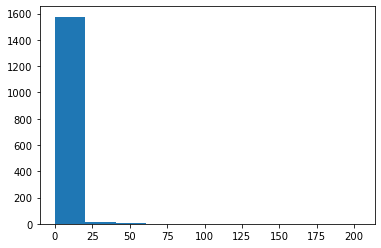

In [95]:
import matplotlib.pyplot as plt
plt.hist(scores)
plt.show()

In [96]:
X_scores=scores[scores["scores"]>=8]
len(X_scores)

88

In [97]:
X_prime=X.iloc[:,X_scores.index]

In [98]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_prime,y,test_size=0.32,random_state=0)
print(X_train.shape)
print(X_test.shape)

(304, 88)
(144, 88)


In [99]:
from sklearn.tree import DecisionTreeClassifier
Tree=DecisionTreeClassifier(class_weight="balanced",
                            random_state=0).fit(X_train,np.asarray(y_train).reshape(y_train.shape[0],))
Tree

DecisionTreeClassifier(class_weight='balanced', random_state=0)

In [100]:
from sklearn.metrics import accuracy_score
train_pred=Tree.predict(X_train)
test_pred=Tree.predict(X_test)
print("Accuracy score for train data: ",accuracy_score(y_train,train_pred))
print("Accuracy score for test data: ",accuracy_score(y_test,test_pred))

Accuracy score for train data:  1.0
Accuracy score for test data:  0.9583333333333334


In [101]:
from sklearn.metrics import roc_auc_score
print("ROC_AUC for train data: ",roc_auc_score(y_train,train_pred))
print("ROC_AUC for test data: ",roc_auc_score(y_test,test_pred))

ROC_AUC for train data:  1.0
ROC_AUC for test data:  0.9609375


In [102]:
from sklearn.metrics import confusion_matrix
print("Confusion matrix for test data: \n",confusion_matrix(y_test,test_pred))

Confusion matrix for test data: 
 [[63  1]
 [ 5 75]]


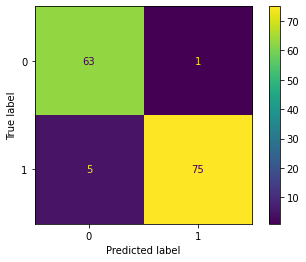

In [103]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
plot_confusion_matrix(Tree,X_test,y_test)
plt.show()

In [104]:
print("Scam blocked rate for test data: ",75/80)
print("Ham blocked rate for test data: ",1/64)
from sklearn.metrics import matthews_corrcoef
print("Mathew correlation coefficient for test data: ",matthews_corrcoef(y_test,test_pred))
print("F1 score for test data: ",f1_score(y_test,test_pred))

Scam blocked rate for test data:  0.9375
Ham blocked rate for test data:  0.015625
Mathew correlation coefficient for test data:  0.917583859556654
F1 score for test data:  0.9615384615384615


In [105]:
#from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
Gradient=GradientBoostingClassifier(max_features="log2",random_state=0).fit(X_train,np.asarray(y_train).reshape(y_train.shape[0],))
Gradient

GradientBoostingClassifier(max_features='log2', random_state=0)

In [106]:
train_pred=Gradient.predict(X_train)
test_pred=Gradient.predict(X_test)
print("Accuracy score for train data: ",accuracy_score(y_train,train_pred))
print("Accuracy score for test data: ",accuracy_score(y_test,test_pred))

Accuracy score for train data:  0.9901315789473685
Accuracy score for test data:  0.9375


In [107]:
print("Confusion matrix for test data: \n",confusion_matrix(y_test,test_pred))

Confusion matrix for test data: 
 [[64  0]
 [ 9 71]]


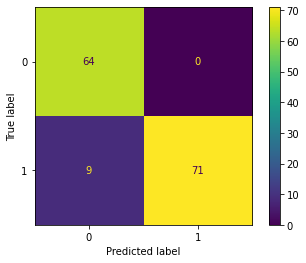

In [108]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
plot_confusion_matrix(Gradient,X_test,y_test)
plt.show()

In [109]:
print("Scam blocked rate for test data: ",71/80)
print("Ham blocked rate for test data: ",0/64)
print("Mathew correlation coefficient for test data: ",matthews_corrcoef(y_test,test_pred))
print("F1 score for test data: ",f1_score(y_test,test_pred))

Scam blocked rate for test data:  0.8875
Ham blocked rate for test data:  0.0
Mathew correlation coefficient for test data:  0.8820896733217218
F1 score for test data:  0.9403973509933775


In [110]:
from sklearn import svm
SVM=svm.SVC(kernel="linear",random_state=0).fit(X_train,np.asarray(y_train).reshape(y_train.shape[0],))
SVM

SVC(kernel='linear', random_state=0)

In [111]:
train_pred=SVM.predict(X_train)
test_pred=SVM.predict(X_test)
print("Accuracy score for train data: ",accuracy_score(y_train,train_pred))
print("Accuracy score for test data: ",accuracy_score(y_test,test_pred))

Accuracy score for train data:  0.9802631578947368
Accuracy score for test data:  0.9375


In [112]:
print("Confusion matrix for test data: \n",confusion_matrix(y_test,test_pred))

Confusion matrix for test data: 
 [[64  0]
 [ 9 71]]


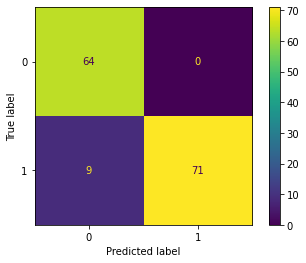

In [113]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
plot_confusion_matrix(SVM,X_test,y_test)
plt.show()

In [114]:
print("Scam blocked rate for test data: ",71/80)
print("Ham blocked rate for test data: ",0/64)
print("Mathew correlation coefficient for test data: ",matthews_corrcoef(y_test,test_pred))
print("F1 score for test data: ",f1_score(y_test,test_pred))

Scam blocked rate for test data:  0.8875
Ham blocked rate for test data:  0.0
Mathew correlation coefficient for test data:  0.8820896733217218
F1 score for test data:  0.9403973509933775


#### Shakira

In [115]:
url="https://bd29ee0e-54ab-4daa-9671-d153865d1620.usrfiles.com/ugd/bd29ee_8551c2b2891148d8884850bcdcc093ce.csv"
df=pd.read_csv(url)
df.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,z13lgffb5w3ddx1ul22qy1wxspy5cpkz504,dharma pal,2015-05-29T02:30:18.971000,Nice song﻿,0
1,z123dbgb0mqjfxbtz22ucjc5jvzcv3ykj,Tiza Arellano,2015-05-29T00:14:48.748000,I love song ﻿,0
2,z12quxxp2vutflkxv04cihggzt2azl34pms0k,Prìñçeśś Âliś Łøvê Dømíñø Mâđiś™ ﻿,2015-05-28T21:00:08.607000,I love song ﻿,0
3,z12icv3ysqvlwth2c23eddlykyqut5z1h,Eric Gonzalez,2015-05-28T20:47:12.193000,"860,000,000 lets make it first female to reach...",0
4,z133stly3kete3tly22petvwdpmghrlli,Analena López,2015-05-28T17:08:29.827000,shakira is best for worldcup﻿,0


In [116]:
df.shape

(370, 5)

In [117]:
X=df[["CONTENT"]]
y=df[["CLASS"]]

In [118]:
y.groupby("CLASS")["CLASS"].count()

CLASS
0    196
1    174
Name: CLASS, dtype: int64

In [119]:
X_list=X.CONTENT.tolist()

In [120]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X_list)

X=pd.DataFrame(X.toarray())
X.head()

,0,1,2,3,4,5,6,7,8,9,...,1347,1348,1349,1350,1351,1352,1353,1354,1355,1356
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [121]:
import numpy as np
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# feature extraction. We are going to output the selection scores for all features and select the features with the highest scores.
test = SelectKBest(score_func=f_classif, k="all")
fit = test.fit(X, np.asarray(y).reshape(y.shape[0],))
features = fit.transform(X)
# summarize scores
set_printoptions(precision=3)

scores=fit.scores_
scores=pd.DataFrame(scores)
scores=scores.rename(columns={0:"scores"})
scores=scores.sort_values(by=["scores"],ascending=False)
scores

,scores
1183,64.208126
127,58.200725
773,55.796110
1114,53.983085
1344,53.049630
...,...
215,0.007096
1287,0.007096
686,0.007096
151,0.007096


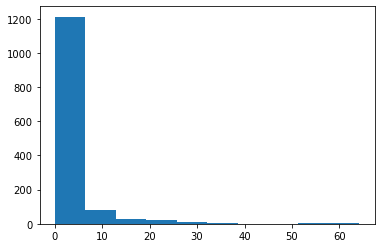

In [122]:
import matplotlib.pyplot as plt
plt.hist(scores)
plt.show()

In [123]:
X_scores=scores[scores["scores"]>=20]
len(X_scores)

36

In [124]:
X_prime=X.iloc[:,X_scores.index]

In [125]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_prime,y,test_size=0.32,random_state=0)
print(X_train.shape)
print(X_test.shape)

(251, 36)
(119, 36)


In [126]:
from sklearn.tree import DecisionTreeClassifier
Tree=DecisionTreeClassifier(criterion="entropy",min_samples_split=4,
                            random_state=0).fit(X_train,np.asarray(y_train).reshape(y_train.shape[0],))
Tree

DecisionTreeClassifier(criterion='entropy', min_samples_split=4, random_state=0)

In [127]:
from sklearn.metrics import accuracy_score
train_pred=Tree.predict(X_train)
test_pred=Tree.predict(X_test)
print("Accuracy score for train data: ",accuracy_score(y_train,train_pred))
print("Accuracy score for test data: ",accuracy_score(y_test,test_pred))

Accuracy score for train data:  0.9681274900398407
Accuracy score for test data:  0.9411764705882353


In [128]:
from sklearn.metrics import roc_auc_score
print("ROC_AUC for train data: ",roc_auc_score(y_train,train_pred))
print("ROC_AUC for test data: ",roc_auc_score(y_test,test_pred))

ROC_AUC for train data:  0.9672282263191354
ROC_AUC for test data:  0.9339622641509434


In [129]:
from sklearn.metrics import confusion_matrix
print("Confusion matrix for test data: \n",confusion_matrix(y_test,test_pred))

Confusion matrix for test data: 
 [[66  0]
 [ 7 46]]


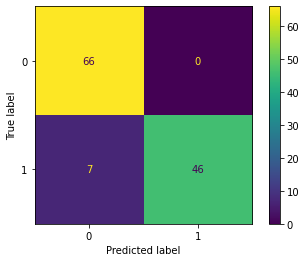

In [130]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
plot_confusion_matrix(Tree,X_test,y_test)
plt.show()

In [131]:
print("Scam blocked rate for test data: ",46/(46+7))
print("Ham blocked rate for test data: ",0/66)
print("Mathew correlation coefficient for test data: ",matthews_corrcoef(y_test,test_pred))
from sklearn.metrics import f1_score
print("F1 score for test data: ",f1_score(y_test,test_pred))

Scam blocked rate for test data:  0.8679245283018868
Ham blocked rate for test data:  0.0
Mathew correlation coefficient for test data:  0.8858323140423959
F1 score for test data:  0.9292929292929293


In [132]:
from sklearn.ensemble import RandomForestClassifier
Forest=RandomForestClassifier(random_state=0).fit(X_train,np.asarray(y_train).reshape(y_train.shape[0],))
Forest

RandomForestClassifier(random_state=0)

In [133]:
from sklearn.metrics import accuracy_score
train_pred=Forest.predict(X_train)
test_pred=Forest.predict(X_test)
print("Accuracy score for train data: ",accuracy_score(y_train,train_pred))
print("Accuracy score for test data: ",accuracy_score(y_test,test_pred))

Accuracy score for train data:  0.9800796812749004
Accuracy score for test data:  0.9495798319327731


In [134]:
from sklearn.metrics import roc_auc_score
print("ROC_AUC for train data: ",roc_auc_score(y_train,train_pred))
print("ROC_AUC for test data: ",roc_auc_score(y_test,test_pred))

ROC_AUC for train data:  0.9793388429752066
ROC_AUC for test data:  0.9433962264150944


In [135]:
print("Confusion matrix for test data: \n",confusion_matrix(y_test,test_pred))

Confusion matrix for test data: 
 [[66  0]
 [ 6 47]]


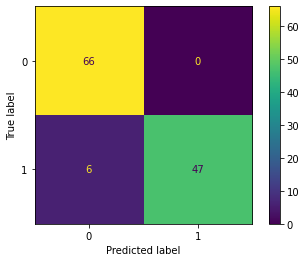

In [136]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
plot_confusion_matrix(Forest,X_test,y_test)
plt.show()

In [137]:
print("Scam blocked rate for test data: ",47/(47+6))
print("Ham blocked rate for test data: ",0/66)
print("Mathew correlation coefficient for test data: ",matthews_corrcoef(y_test,test_pred))
print("F1 score for test data: ",f1_score(y_test,test_pred))

Scam blocked rate for test data:  0.8867924528301887
Ham blocked rate for test data:  0.0
Mathew correlation coefficient for test data:  0.9016058350304784
F1 score for test data:  0.9400000000000001


In [138]:
from sklearn import svm
SVM=svm.SVC(C=2,kernel="linear",random_state=0).fit(X_train,np.asarray(y_train).reshape(y_train.shape[0],))
SVM

SVC(C=2, kernel='linear', random_state=0)

In [139]:
train_pred=SVM.predict(X_train)
test_pred=SVM.predict(X_test)
print("Accuracy score for train data: ",accuracy_score(y_train,train_pred))
print("Accuracy score for test data: ",accuracy_score(y_test,test_pred))

Accuracy score for train data:  0.9681274900398407
Accuracy score for test data:  0.9411764705882353


In [140]:
print("ROC_AUC for train data: ",roc_auc_score(y_train,train_pred))
print("ROC_AUC for test data: ",roc_auc_score(y_test,test_pred))

ROC_AUC for train data:  0.9672282263191354
ROC_AUC for test data:  0.9339622641509434


In [141]:
print("Confusion matrix for test data: \n",confusion_matrix(y_test,test_pred))

Confusion matrix for test data: 
 [[66  0]
 [ 7 46]]


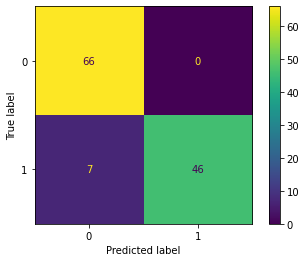

In [142]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
plot_confusion_matrix(SVM,X_test,y_test)
plt.show()

In [143]:
print("Scam blocked rate for test data: ",46/(46+7))
print("Ham blocked rate for test data: ",0/66)
print("Mathew correlation coefficient for test data: ",matthews_corrcoef(y_test,test_pred))
print("F1 score for test data: ",f1_score(y_test,test_pred))

Scam blocked rate for test data:  0.8679245283018868
Ham blocked rate for test data:  0.0
Mathew correlation coefficient for test data:  0.8858323140423959
F1 score for test data:  0.9292929292929293


In [384]:
from sklearn.model_selection import GridSearchCV

In [385]:
param_grid={"C":[1,2,3,4,5,6,7,8],"kernel":["linear","rbf"],"degree":[1,2,3,4,5],"shrinking":[True, False],
            "decision_function_shape":["ovo","ovr"]}

In [386]:
from sklearn import svm
SVM=svm.SVC(random_state=0)
SVM_grid = GridSearchCV(estimator =SVM, param_grid = param_grid,cv = 10, verbose=2, n_jobs = -1)

In [387]:
SVM_grid.fit(X_train,np.asarray(y_train).reshape(y_train.shape[0],))

Fitting 10 folds for each of 320 candidates, totalling 3200 fits
[CV] C=1, decision_function_shape=ovo, degree=1, kernel=linear, shrinking=True 
[CV]  C=1, decision_function_shape=ovo, degree=1, kernel=linear, shrinking=True, total=   0.0s
[CV] C=1, decision_function_shape=ovo, degree=1, kernel=linear, shrinking=True 
[CV]  C=1, decision_function_shape=ovo, degree=1, kernel=linear, shrinking=True, total=   0.0s
[CV] C=1, decision_function_shape=ovo, degree=1, kernel=linear, shrinking=True 
[CV]  C=1, decision_function_shape=ovo, degree=1, kernel=linear, shrinking=True, total=   0.0s
[CV] C=1, decision_function_shape=ovo, degree=1, kernel=linear, shrinking=True 
[CV]  C=1, decision_function_shape=ovo, degree=1, kernel=linear, shrinking=True, total=   0.0s
[CV] C=1, decision_function_shape=ovo, degree=1, kernel=linear, shrinking=True 
[CV]  C=1, decision_function_shape=ovo, degree=1, kernel=linear, shrinking=True, total=   0.0s
[CV] C=1, decision_function_shape=ovo, degree=1, kernel=line

[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  C=1, decision_function_shape=ovo, degree=1, kernel=linear, shrinking=False, total=   0.0s
[CV] C=1, decision_function_shape=ovo, degree=1, kernel=linear, shrinking=False 
[CV]  C=1, decision_function_shape=ovo, degree=1, kernel=linear, shrinking=False, total=   0.0s
[CV] C=1, decision_function_shape=ovo, degree=1, kernel=linear, shrinking=False 
[CV]  C=1, decision_function_shape=ovo, degree=1, kernel=linear, shrinking=False, total=   0.0s
[CV] C=1, decision_function_shape=ovo, degree=1, kernel=linear, shrinking=False 
[CV]  C=1, decision_function_shape=ovo, degree=1, kernel=linear, shrinking=False, total=   0.0s
[CV] C=1, decision_function_shape=ovo, degree=1, kernel=linear, shrinking=False 
[CV]  C=1, decision_function_shape=ovo, degree=1, kernel=linear, shrinking=False, total=   0.0s
[CV] C=1, decision_function_shape=ovo, degree=1, kernel=linear, shrinking=False 
[CV]  C=1, decision_function_shape=ovo, degree=1, kernel=linear, shrinking=False, total=   0.0s
[CV] C=1, decision_

[CV]  C=1, decision_function_shape=ovo, degree=2, kernel=rbf, shrinking=False, total=   0.0s
[CV] C=1, decision_function_shape=ovo, degree=2, kernel=rbf, shrinking=False 
[CV]  C=1, decision_function_shape=ovo, degree=2, kernel=rbf, shrinking=False, total=   0.0s
[CV] C=1, decision_function_shape=ovo, degree=2, kernel=rbf, shrinking=False 
[CV]  C=1, decision_function_shape=ovo, degree=2, kernel=rbf, shrinking=False, total=   0.0s
[CV] C=1, decision_function_shape=ovo, degree=3, kernel=linear, shrinking=True 
[CV]  C=1, decision_function_shape=ovo, degree=3, kernel=linear, shrinking=True, total=   0.0s
[CV] C=1, decision_function_shape=ovo, degree=3, kernel=linear, shrinking=True 
[CV]  C=1, decision_function_shape=ovo, degree=3, kernel=linear, shrinking=True, total=   0.0s
[CV] C=1, decision_function_shape=ovo, degree=3, kernel=linear, shrinking=True 
[CV]  C=1, decision_function_shape=ovo, degree=3, kernel=linear, shrinking=True, total=   0.0s
[CV] C=1, decision_function_shape=ovo, d

[CV]  C=1, decision_function_shape=ovo, degree=4, kernel=linear, shrinking=False, total=   0.0s
[CV] C=1, decision_function_shape=ovo, degree=4, kernel=linear, shrinking=False 
[CV]  C=1, decision_function_shape=ovo, degree=4, kernel=linear, shrinking=False, total=   0.0s
[CV] C=1, decision_function_shape=ovo, degree=4, kernel=linear, shrinking=False 
[CV]  C=1, decision_function_shape=ovo, degree=4, kernel=linear, shrinking=False, total=   0.0s
[CV] C=1, decision_function_shape=ovo, degree=4, kernel=linear, shrinking=False 
[CV]  C=1, decision_function_shape=ovo, degree=4, kernel=linear, shrinking=False, total=   0.0s
[CV] C=1, decision_function_shape=ovo, degree=4, kernel=linear, shrinking=False 
[CV]  C=1, decision_function_shape=ovo, degree=4, kernel=linear, shrinking=False, total=   0.0s
[CV] C=1, decision_function_shape=ovo, degree=4, kernel=linear, shrinking=False 
[CV]  C=1, decision_function_shape=ovo, degree=4, kernel=linear, shrinking=False, total=   0.0s
[CV] C=1, decision_

[CV]  C=1, decision_function_shape=ovo, degree=5, kernel=rbf, shrinking=False, total=   0.0s
[CV] C=1, decision_function_shape=ovo, degree=5, kernel=rbf, shrinking=False 
[CV]  C=1, decision_function_shape=ovo, degree=5, kernel=rbf, shrinking=False, total=   0.0s
[CV] C=1, decision_function_shape=ovo, degree=5, kernel=rbf, shrinking=False 
[CV]  C=1, decision_function_shape=ovo, degree=5, kernel=rbf, shrinking=False, total=   0.0s
[CV] C=1, decision_function_shape=ovo, degree=5, kernel=rbf, shrinking=False 
[CV]  C=1, decision_function_shape=ovo, degree=5, kernel=rbf, shrinking=False, total=   0.0s
[CV] C=1, decision_function_shape=ovo, degree=5, kernel=rbf, shrinking=False 
[CV]  C=1, decision_function_shape=ovo, degree=5, kernel=rbf, shrinking=False, total=   0.0s
[CV] C=1, decision_function_shape=ovo, degree=5, kernel=rbf, shrinking=False 
[CV]  C=1, decision_function_shape=ovo, degree=5, kernel=rbf, shrinking=False, total=   0.0s
[CV] C=1, decision_function_shape=ovo, degree=5, ker

[CV]  C=1, decision_function_shape=ovr, degree=2, kernel=linear, shrinking=True, total=   0.0s
[CV] C=1, decision_function_shape=ovr, degree=2, kernel=linear, shrinking=True 
[CV]  C=1, decision_function_shape=ovr, degree=2, kernel=linear, shrinking=True, total=   0.0s
[CV] C=1, decision_function_shape=ovr, degree=2, kernel=linear, shrinking=True 
[CV]  C=1, decision_function_shape=ovr, degree=2, kernel=linear, shrinking=True, total=   0.0s
[CV] C=1, decision_function_shape=ovr, degree=2, kernel=linear, shrinking=True 
[CV]  C=1, decision_function_shape=ovr, degree=2, kernel=linear, shrinking=True, total=   0.0s
[CV] C=1, decision_function_shape=ovr, degree=2, kernel=linear, shrinking=True 
[CV]  C=1, decision_function_shape=ovr, degree=2, kernel=linear, shrinking=True, total=   0.0s
[CV] C=1, decision_function_shape=ovr, degree=2, kernel=linear, shrinking=True 
[CV]  C=1, decision_function_shape=ovr, degree=2, kernel=linear, shrinking=True, total=   0.0s
[CV] C=1, decision_function_sh

[CV]  C=1, decision_function_shape=ovr, degree=3, kernel=linear, shrinking=False, total=   0.0s
[CV] C=1, decision_function_shape=ovr, degree=3, kernel=linear, shrinking=False 
[CV]  C=1, decision_function_shape=ovr, degree=3, kernel=linear, shrinking=False, total=   0.0s
[CV] C=1, decision_function_shape=ovr, degree=3, kernel=rbf, shrinking=True 
[CV]  C=1, decision_function_shape=ovr, degree=3, kernel=rbf, shrinking=True, total=   0.0s
[CV] C=1, decision_function_shape=ovr, degree=3, kernel=rbf, shrinking=True 
[CV]  C=1, decision_function_shape=ovr, degree=3, kernel=rbf, shrinking=True, total=   0.0s
[CV] C=1, decision_function_shape=ovr, degree=3, kernel=rbf, shrinking=True 
[CV]  C=1, decision_function_shape=ovr, degree=3, kernel=rbf, shrinking=True, total=   0.0s
[CV] C=1, decision_function_shape=ovr, degree=3, kernel=rbf, shrinking=True 
[CV]  C=1, decision_function_shape=ovr, degree=3, kernel=rbf, shrinking=True, total=   0.0s
[CV] C=1, decision_function_shape=ovr, degree=3, ke

[CV]  C=1, decision_function_shape=ovr, degree=4, kernel=rbf, shrinking=False, total=   0.0s
[CV] C=1, decision_function_shape=ovr, degree=4, kernel=rbf, shrinking=False 
[CV]  C=1, decision_function_shape=ovr, degree=4, kernel=rbf, shrinking=False, total=   0.0s
[CV] C=1, decision_function_shape=ovr, degree=4, kernel=rbf, shrinking=False 
[CV]  C=1, decision_function_shape=ovr, degree=4, kernel=rbf, shrinking=False, total=   0.0s
[CV] C=1, decision_function_shape=ovr, degree=4, kernel=rbf, shrinking=False 
[CV]  C=1, decision_function_shape=ovr, degree=4, kernel=rbf, shrinking=False, total=   0.0s
[CV] C=1, decision_function_shape=ovr, degree=4, kernel=rbf, shrinking=False 
[CV]  C=1, decision_function_shape=ovr, degree=4, kernel=rbf, shrinking=False, total=   0.0s
[CV] C=1, decision_function_shape=ovr, degree=4, kernel=rbf, shrinking=False 
[CV]  C=1, decision_function_shape=ovr, degree=4, kernel=rbf, shrinking=False, total=   0.0s
[CV] C=1, decision_function_shape=ovr, degree=4, ker

[CV]  C=1, decision_function_shape=ovr, degree=5, kernel=rbf, shrinking=False, total=   0.0s
[CV] C=2, decision_function_shape=ovo, degree=1, kernel=linear, shrinking=True 
[CV]  C=2, decision_function_shape=ovo, degree=1, kernel=linear, shrinking=True, total=   0.0s
[CV] C=2, decision_function_shape=ovo, degree=1, kernel=linear, shrinking=True 
[CV]  C=2, decision_function_shape=ovo, degree=1, kernel=linear, shrinking=True, total=   0.0s
[CV] C=2, decision_function_shape=ovo, degree=1, kernel=linear, shrinking=True 
[CV]  C=2, decision_function_shape=ovo, degree=1, kernel=linear, shrinking=True, total=   0.0s
[CV] C=2, decision_function_shape=ovo, degree=1, kernel=linear, shrinking=True 
[CV]  C=2, decision_function_shape=ovo, degree=1, kernel=linear, shrinking=True, total=   0.0s
[CV] C=2, decision_function_shape=ovo, degree=1, kernel=linear, shrinking=True 
[CV]  C=2, decision_function_shape=ovo, degree=1, kernel=linear, shrinking=True, total=   0.0s
[CV] C=2, decision_function_shap

[CV]  C=2, decision_function_shape=ovo, degree=2, kernel=linear, shrinking=False, total=   0.0s
[CV] C=2, decision_function_shape=ovo, degree=2, kernel=linear, shrinking=False 
[CV]  C=2, decision_function_shape=ovo, degree=2, kernel=linear, shrinking=False, total=   0.0s
[CV] C=2, decision_function_shape=ovo, degree=2, kernel=linear, shrinking=False 
[CV]  C=2, decision_function_shape=ovo, degree=2, kernel=linear, shrinking=False, total=   0.0s
[CV] C=2, decision_function_shape=ovo, degree=2, kernel=linear, shrinking=False 
[CV]  C=2, decision_function_shape=ovo, degree=2, kernel=linear, shrinking=False, total=   0.0s
[CV] C=2, decision_function_shape=ovo, degree=2, kernel=linear, shrinking=False 
[CV]  C=2, decision_function_shape=ovo, degree=2, kernel=linear, shrinking=False, total=   0.0s
[CV] C=2, decision_function_shape=ovo, degree=2, kernel=linear, shrinking=False 
[CV]  C=2, decision_function_shape=ovo, degree=2, kernel=linear, shrinking=False, total=   0.0s
[CV] C=2, decision_

[CV]  C=2, decision_function_shape=ovo, degree=3, kernel=rbf, shrinking=True, total=   0.0s
[CV] C=2, decision_function_shape=ovo, degree=3, kernel=rbf, shrinking=True 
[CV]  C=2, decision_function_shape=ovo, degree=3, kernel=rbf, shrinking=True, total=   0.0s
[CV] C=2, decision_function_shape=ovo, degree=3, kernel=rbf, shrinking=True 
[CV]  C=2, decision_function_shape=ovo, degree=3, kernel=rbf, shrinking=True, total=   0.0s
[CV] C=2, decision_function_shape=ovo, degree=3, kernel=rbf, shrinking=True 
[CV]  C=2, decision_function_shape=ovo, degree=3, kernel=rbf, shrinking=True, total=   0.0s
[CV] C=2, decision_function_shape=ovo, degree=3, kernel=rbf, shrinking=True 
[CV]  C=2, decision_function_shape=ovo, degree=3, kernel=rbf, shrinking=True, total=   0.0s
[CV] C=2, decision_function_shape=ovo, degree=3, kernel=rbf, shrinking=True 
[CV]  C=2, decision_function_shape=ovo, degree=3, kernel=rbf, shrinking=True, total=   0.0s
[CV] C=2, decision_function_shape=ovo, degree=3, kernel=rbf, sh

[CV]  C=2, decision_function_shape=ovo, degree=4, kernel=rbf, shrinking=False, total=   0.0s
[CV] C=2, decision_function_shape=ovo, degree=4, kernel=rbf, shrinking=False 
[CV]  C=2, decision_function_shape=ovo, degree=4, kernel=rbf, shrinking=False, total=   0.0s
[CV] C=2, decision_function_shape=ovo, degree=4, kernel=rbf, shrinking=False 
[CV]  C=2, decision_function_shape=ovo, degree=4, kernel=rbf, shrinking=False, total=   0.0s
[CV] C=2, decision_function_shape=ovo, degree=5, kernel=linear, shrinking=True 
[CV]  C=2, decision_function_shape=ovo, degree=5, kernel=linear, shrinking=True, total=   0.0s
[CV] C=2, decision_function_shape=ovo, degree=5, kernel=linear, shrinking=True 
[CV]  C=2, decision_function_shape=ovo, degree=5, kernel=linear, shrinking=True, total=   0.0s
[CV] C=2, decision_function_shape=ovo, degree=5, kernel=linear, shrinking=True 
[CV]  C=2, decision_function_shape=ovo, degree=5, kernel=linear, shrinking=True, total=   0.0s
[CV] C=2, decision_function_shape=ovo, d

[CV]  C=2, decision_function_shape=ovr, degree=1, kernel=linear, shrinking=False, total=   0.0s
[CV] C=2, decision_function_shape=ovr, degree=1, kernel=linear, shrinking=False 
[CV]  C=2, decision_function_shape=ovr, degree=1, kernel=linear, shrinking=False, total=   0.0s
[CV] C=2, decision_function_shape=ovr, degree=1, kernel=linear, shrinking=False 
[CV]  C=2, decision_function_shape=ovr, degree=1, kernel=linear, shrinking=False, total=   0.0s
[CV] C=2, decision_function_shape=ovr, degree=1, kernel=linear, shrinking=False 
[CV]  C=2, decision_function_shape=ovr, degree=1, kernel=linear, shrinking=False, total=   0.0s
[CV] C=2, decision_function_shape=ovr, degree=1, kernel=linear, shrinking=False 
[CV]  C=2, decision_function_shape=ovr, degree=1, kernel=linear, shrinking=False, total=   0.0s
[CV] C=2, decision_function_shape=ovr, degree=1, kernel=rbf, shrinking=True 
[CV]  C=2, decision_function_shape=ovr, degree=1, kernel=rbf, shrinking=True, total=   0.0s
[CV] C=2, decision_function

[CV]  C=2, decision_function_shape=ovr, degree=2, kernel=rbf, shrinking=False, total=   0.0s
[CV] C=2, decision_function_shape=ovr, degree=2, kernel=rbf, shrinking=False 
[CV]  C=2, decision_function_shape=ovr, degree=2, kernel=rbf, shrinking=False, total=   0.0s
[CV] C=2, decision_function_shape=ovr, degree=2, kernel=rbf, shrinking=False 
[CV]  C=2, decision_function_shape=ovr, degree=2, kernel=rbf, shrinking=False, total=   0.0s
[CV] C=2, decision_function_shape=ovr, degree=2, kernel=rbf, shrinking=False 
[CV]  C=2, decision_function_shape=ovr, degree=2, kernel=rbf, shrinking=False, total=   0.0s
[CV] C=2, decision_function_shape=ovr, degree=2, kernel=rbf, shrinking=False 
[CV]  C=2, decision_function_shape=ovr, degree=2, kernel=rbf, shrinking=False, total=   0.0s
[CV] C=2, decision_function_shape=ovr, degree=2, kernel=rbf, shrinking=False 
[CV]  C=2, decision_function_shape=ovr, degree=2, kernel=rbf, shrinking=False, total=   0.0s
[CV] C=2, decision_function_shape=ovr, degree=2, ker

[CV]  C=2, decision_function_shape=ovr, degree=4, kernel=linear, shrinking=True, total=   0.0s
[CV] C=2, decision_function_shape=ovr, degree=4, kernel=linear, shrinking=True 
[CV]  C=2, decision_function_shape=ovr, degree=4, kernel=linear, shrinking=True, total=   0.0s
[CV] C=2, decision_function_shape=ovr, degree=4, kernel=linear, shrinking=True 
[CV]  C=2, decision_function_shape=ovr, degree=4, kernel=linear, shrinking=True, total=   0.0s
[CV] C=2, decision_function_shape=ovr, degree=4, kernel=linear, shrinking=True 
[CV]  C=2, decision_function_shape=ovr, degree=4, kernel=linear, shrinking=True, total=   0.0s
[CV] C=2, decision_function_shape=ovr, degree=4, kernel=linear, shrinking=True 
[CV]  C=2, decision_function_shape=ovr, degree=4, kernel=linear, shrinking=True, total=   0.0s
[CV] C=2, decision_function_shape=ovr, degree=4, kernel=linear, shrinking=False 
[CV]  C=2, decision_function_shape=ovr, degree=4, kernel=linear, shrinking=False, total=   0.0s
[CV] C=2, decision_function_

[CV]  C=2, decision_function_shape=ovr, degree=5, kernel=rbf, shrinking=True, total=   0.0s
[CV] C=2, decision_function_shape=ovr, degree=5, kernel=rbf, shrinking=True 
[CV]  C=2, decision_function_shape=ovr, degree=5, kernel=rbf, shrinking=True, total=   0.0s
[CV] C=2, decision_function_shape=ovr, degree=5, kernel=rbf, shrinking=True 
[CV]  C=2, decision_function_shape=ovr, degree=5, kernel=rbf, shrinking=True, total=   0.0s
[CV] C=2, decision_function_shape=ovr, degree=5, kernel=rbf, shrinking=True 
[CV]  C=2, decision_function_shape=ovr, degree=5, kernel=rbf, shrinking=True, total=   0.0s
[CV] C=2, decision_function_shape=ovr, degree=5, kernel=rbf, shrinking=True 
[CV]  C=2, decision_function_shape=ovr, degree=5, kernel=rbf, shrinking=True, total=   0.0s
[CV] C=2, decision_function_shape=ovr, degree=5, kernel=rbf, shrinking=True 
[CV]  C=2, decision_function_shape=ovr, degree=5, kernel=rbf, shrinking=True, total=   0.0s
[CV] C=2, decision_function_shape=ovr, degree=5, kernel=rbf, sh

[CV]  C=3, decision_function_shape=ovo, degree=1, kernel=rbf, shrinking=False, total=   0.0s
[CV] C=3, decision_function_shape=ovo, degree=1, kernel=rbf, shrinking=False 
[CV]  C=3, decision_function_shape=ovo, degree=1, kernel=rbf, shrinking=False, total=   0.0s
[CV] C=3, decision_function_shape=ovo, degree=1, kernel=rbf, shrinking=False 
[CV]  C=3, decision_function_shape=ovo, degree=1, kernel=rbf, shrinking=False, total=   0.0s
[CV] C=3, decision_function_shape=ovo, degree=1, kernel=rbf, shrinking=False 
[CV]  C=3, decision_function_shape=ovo, degree=1, kernel=rbf, shrinking=False, total=   0.0s
[CV] C=3, decision_function_shape=ovo, degree=1, kernel=rbf, shrinking=False 
[CV]  C=3, decision_function_shape=ovo, degree=1, kernel=rbf, shrinking=False, total=   0.0s
[CV] C=3, decision_function_shape=ovo, degree=1, kernel=rbf, shrinking=False 
[CV]  C=3, decision_function_shape=ovo, degree=1, kernel=rbf, shrinking=False, total=   0.0s
[CV] C=3, decision_function_shape=ovo, degree=1, ker

[CV]  C=3, decision_function_shape=ovo, degree=3, kernel=linear, shrinking=True, total=   0.0s
[CV] C=3, decision_function_shape=ovo, degree=3, kernel=linear, shrinking=True 
[CV]  C=3, decision_function_shape=ovo, degree=3, kernel=linear, shrinking=True, total=   0.0s
[CV] C=3, decision_function_shape=ovo, degree=3, kernel=linear, shrinking=True 
[CV]  C=3, decision_function_shape=ovo, degree=3, kernel=linear, shrinking=True, total=   0.0s
[CV] C=3, decision_function_shape=ovo, degree=3, kernel=linear, shrinking=True 
[CV]  C=3, decision_function_shape=ovo, degree=3, kernel=linear, shrinking=True, total=   0.0s
[CV] C=3, decision_function_shape=ovo, degree=3, kernel=linear, shrinking=True 
[CV]  C=3, decision_function_shape=ovo, degree=3, kernel=linear, shrinking=True, total=   0.0s
[CV] C=3, decision_function_shape=ovo, degree=3, kernel=linear, shrinking=True 
[CV]  C=3, decision_function_shape=ovo, degree=3, kernel=linear, shrinking=True, total=   0.0s
[CV] C=3, decision_function_sh

[CV]  C=3, decision_function_shape=ovo, degree=4, kernel=linear, shrinking=False, total=   0.0s
[CV] C=3, decision_function_shape=ovo, degree=4, kernel=linear, shrinking=False 
[CV]  C=3, decision_function_shape=ovo, degree=4, kernel=linear, shrinking=False, total=   0.0s
[CV] C=3, decision_function_shape=ovo, degree=4, kernel=linear, shrinking=False 
[CV]  C=3, decision_function_shape=ovo, degree=4, kernel=linear, shrinking=False, total=   0.0s
[CV] C=3, decision_function_shape=ovo, degree=4, kernel=rbf, shrinking=True 
[CV]  C=3, decision_function_shape=ovo, degree=4, kernel=rbf, shrinking=True, total=   0.0s
[CV] C=3, decision_function_shape=ovo, degree=4, kernel=rbf, shrinking=True 
[CV]  C=3, decision_function_shape=ovo, degree=4, kernel=rbf, shrinking=True, total=   0.0s
[CV] C=3, decision_function_shape=ovo, degree=4, kernel=rbf, shrinking=True 
[CV]  C=3, decision_function_shape=ovo, degree=4, kernel=rbf, shrinking=True, total=   0.0s
[CV] C=3, decision_function_shape=ovo, degr

[CV]  C=3, decision_function_shape=ovo, degree=5, kernel=rbf, shrinking=False, total=   0.0s
[CV] C=3, decision_function_shape=ovo, degree=5, kernel=rbf, shrinking=False 
[CV]  C=3, decision_function_shape=ovo, degree=5, kernel=rbf, shrinking=False, total=   0.0s
[CV] C=3, decision_function_shape=ovo, degree=5, kernel=rbf, shrinking=False 
[CV]  C=3, decision_function_shape=ovo, degree=5, kernel=rbf, shrinking=False, total=   0.0s
[CV] C=3, decision_function_shape=ovo, degree=5, kernel=rbf, shrinking=False 
[CV]  C=3, decision_function_shape=ovo, degree=5, kernel=rbf, shrinking=False, total=   0.0s
[CV] C=3, decision_function_shape=ovo, degree=5, kernel=rbf, shrinking=False 
[CV]  C=3, decision_function_shape=ovo, degree=5, kernel=rbf, shrinking=False, total=   0.0s
[CV] C=3, decision_function_shape=ovo, degree=5, kernel=rbf, shrinking=False 
[CV]  C=3, decision_function_shape=ovo, degree=5, kernel=rbf, shrinking=False, total=   0.0s
[CV] C=3, decision_function_shape=ovo, degree=5, ker

[CV]  C=3, decision_function_shape=ovr, degree=2, kernel=linear, shrinking=False, total=   0.0s
[CV] C=3, decision_function_shape=ovr, degree=2, kernel=linear, shrinking=False 
[CV]  C=3, decision_function_shape=ovr, degree=2, kernel=linear, shrinking=False, total=   0.0s
[CV] C=3, decision_function_shape=ovr, degree=2, kernel=linear, shrinking=False 
[CV]  C=3, decision_function_shape=ovr, degree=2, kernel=linear, shrinking=False, total=   0.0s
[CV] C=3, decision_function_shape=ovr, degree=2, kernel=rbf, shrinking=True 
[CV]  C=3, decision_function_shape=ovr, degree=2, kernel=rbf, shrinking=True, total=   0.0s
[CV] C=3, decision_function_shape=ovr, degree=2, kernel=rbf, shrinking=True 
[CV]  C=3, decision_function_shape=ovr, degree=2, kernel=rbf, shrinking=True, total=   0.0s
[CV] C=3, decision_function_shape=ovr, degree=2, kernel=rbf, shrinking=True 
[CV]  C=3, decision_function_shape=ovr, degree=2, kernel=rbf, shrinking=True, total=   0.0s
[CV] C=3, decision_function_shape=ovr, degr

[CV]  C=3, decision_function_shape=ovr, degree=3, kernel=rbf, shrinking=False, total=   0.0s
[CV] C=3, decision_function_shape=ovr, degree=3, kernel=rbf, shrinking=False 
[CV]  C=3, decision_function_shape=ovr, degree=3, kernel=rbf, shrinking=False, total=   0.0s
[CV] C=3, decision_function_shape=ovr, degree=3, kernel=rbf, shrinking=False 
[CV]  C=3, decision_function_shape=ovr, degree=3, kernel=rbf, shrinking=False, total=   0.0s
[CV] C=3, decision_function_shape=ovr, degree=3, kernel=rbf, shrinking=False 
[CV]  C=3, decision_function_shape=ovr, degree=3, kernel=rbf, shrinking=False, total=   0.0s
[CV] C=3, decision_function_shape=ovr, degree=3, kernel=rbf, shrinking=False 
[CV]  C=3, decision_function_shape=ovr, degree=3, kernel=rbf, shrinking=False, total=   0.0s
[CV] C=3, decision_function_shape=ovr, degree=3, kernel=rbf, shrinking=False 
[CV]  C=3, decision_function_shape=ovr, degree=3, kernel=rbf, shrinking=False, total=   0.0s
[CV] C=3, decision_function_shape=ovr, degree=4, ker

[CV]  C=3, decision_function_shape=ovr, degree=5, kernel=linear, shrinking=True, total=   0.0s
[CV] C=3, decision_function_shape=ovr, degree=5, kernel=linear, shrinking=False 
[CV]  C=3, decision_function_shape=ovr, degree=5, kernel=linear, shrinking=False, total=   0.0s
[CV] C=3, decision_function_shape=ovr, degree=5, kernel=linear, shrinking=False 
[CV]  C=3, decision_function_shape=ovr, degree=5, kernel=linear, shrinking=False, total=   0.0s
[CV] C=3, decision_function_shape=ovr, degree=5, kernel=linear, shrinking=False 
[CV]  C=3, decision_function_shape=ovr, degree=5, kernel=linear, shrinking=False, total=   0.0s
[CV] C=3, decision_function_shape=ovr, degree=5, kernel=linear, shrinking=False 
[CV]  C=3, decision_function_shape=ovr, degree=5, kernel=linear, shrinking=False, total=   0.0s
[CV] C=3, decision_function_shape=ovr, degree=5, kernel=linear, shrinking=False 
[CV]  C=3, decision_function_shape=ovr, degree=5, kernel=linear, shrinking=False, total=   0.0s
[CV] C=3, decision_f

[CV]  C=4, decision_function_shape=ovo, degree=1, kernel=rbf, shrinking=True, total=   0.0s
[CV] C=4, decision_function_shape=ovo, degree=1, kernel=rbf, shrinking=False 
[CV]  C=4, decision_function_shape=ovo, degree=1, kernel=rbf, shrinking=False, total=   0.0s
[CV] C=4, decision_function_shape=ovo, degree=1, kernel=rbf, shrinking=False 
[CV]  C=4, decision_function_shape=ovo, degree=1, kernel=rbf, shrinking=False, total=   0.0s
[CV] C=4, decision_function_shape=ovo, degree=1, kernel=rbf, shrinking=False 
[CV]  C=4, decision_function_shape=ovo, degree=1, kernel=rbf, shrinking=False, total=   0.0s
[CV] C=4, decision_function_shape=ovo, degree=1, kernel=rbf, shrinking=False 
[CV]  C=4, decision_function_shape=ovo, degree=1, kernel=rbf, shrinking=False, total=   0.0s
[CV] C=4, decision_function_shape=ovo, degree=1, kernel=rbf, shrinking=False 
[CV]  C=4, decision_function_shape=ovo, degree=1, kernel=rbf, shrinking=False, total=   0.0s
[CV] C=4, decision_function_shape=ovo, degree=1, kern

[CV]  C=4, decision_function_shape=ovo, degree=3, kernel=linear, shrinking=True, total=   0.0s
[CV] C=4, decision_function_shape=ovo, degree=3, kernel=linear, shrinking=True 
[CV]  C=4, decision_function_shape=ovo, degree=3, kernel=linear, shrinking=True, total=   0.0s
[CV] C=4, decision_function_shape=ovo, degree=3, kernel=linear, shrinking=True 
[CV]  C=4, decision_function_shape=ovo, degree=3, kernel=linear, shrinking=True, total=   0.0s
[CV] C=4, decision_function_shape=ovo, degree=3, kernel=linear, shrinking=True 
[CV]  C=4, decision_function_shape=ovo, degree=3, kernel=linear, shrinking=True, total=   0.0s
[CV] C=4, decision_function_shape=ovo, degree=3, kernel=linear, shrinking=True 
[CV]  C=4, decision_function_shape=ovo, degree=3, kernel=linear, shrinking=True, total=   0.0s
[CV] C=4, decision_function_shape=ovo, degree=3, kernel=linear, shrinking=True 
[CV]  C=4, decision_function_shape=ovo, degree=3, kernel=linear, shrinking=True, total=   0.0s
[CV] C=4, decision_function_sh

[CV]  C=4, decision_function_shape=ovo, degree=4, kernel=linear, shrinking=False, total=   0.0s
[CV] C=4, decision_function_shape=ovo, degree=4, kernel=linear, shrinking=False 
[CV]  C=4, decision_function_shape=ovo, degree=4, kernel=linear, shrinking=False, total=   0.0s
[CV] C=4, decision_function_shape=ovo, degree=4, kernel=linear, shrinking=False 
[CV]  C=4, decision_function_shape=ovo, degree=4, kernel=linear, shrinking=False, total=   0.0s
[CV] C=4, decision_function_shape=ovo, degree=4, kernel=linear, shrinking=False 
[CV]  C=4, decision_function_shape=ovo, degree=4, kernel=linear, shrinking=False, total=   0.0s
[CV] C=4, decision_function_shape=ovo, degree=4, kernel=linear, shrinking=False 
[CV]  C=4, decision_function_shape=ovo, degree=4, kernel=linear, shrinking=False, total=   0.0s
[CV] C=4, decision_function_shape=ovo, degree=4, kernel=linear, shrinking=False 
[CV]  C=4, decision_function_shape=ovo, degree=4, kernel=linear, shrinking=False, total=   0.0s
[CV] C=4, decision_

[CV]  C=4, decision_function_shape=ovo, degree=5, kernel=rbf, shrinking=True, total=   0.0s
[CV] C=4, decision_function_shape=ovo, degree=5, kernel=rbf, shrinking=True 
[CV]  C=4, decision_function_shape=ovo, degree=5, kernel=rbf, shrinking=True, total=   0.0s
[CV] C=4, decision_function_shape=ovo, degree=5, kernel=rbf, shrinking=True 
[CV]  C=4, decision_function_shape=ovo, degree=5, kernel=rbf, shrinking=True, total=   0.0s
[CV] C=4, decision_function_shape=ovo, degree=5, kernel=rbf, shrinking=True 
[CV]  C=4, decision_function_shape=ovo, degree=5, kernel=rbf, shrinking=True, total=   0.0s
[CV] C=4, decision_function_shape=ovo, degree=5, kernel=rbf, shrinking=False 
[CV]  C=4, decision_function_shape=ovo, degree=5, kernel=rbf, shrinking=False, total=   0.0s
[CV] C=4, decision_function_shape=ovo, degree=5, kernel=rbf, shrinking=False 
[CV]  C=4, decision_function_shape=ovo, degree=5, kernel=rbf, shrinking=False, total=   0.0s
[CV] C=4, decision_function_shape=ovo, degree=5, kernel=rbf

[CV]  C=4, decision_function_shape=ovr, degree=2, kernel=linear, shrinking=True, total=   0.0s
[CV] C=4, decision_function_shape=ovr, degree=2, kernel=linear, shrinking=True 
[CV]  C=4, decision_function_shape=ovr, degree=2, kernel=linear, shrinking=True, total=   0.0s
[CV] C=4, decision_function_shape=ovr, degree=2, kernel=linear, shrinking=True 
[CV]  C=4, decision_function_shape=ovr, degree=2, kernel=linear, shrinking=True, total=   0.0s
[CV] C=4, decision_function_shape=ovr, degree=2, kernel=linear, shrinking=True 
[CV]  C=4, decision_function_shape=ovr, degree=2, kernel=linear, shrinking=True, total=   0.0s
[CV] C=4, decision_function_shape=ovr, degree=2, kernel=linear, shrinking=True 
[CV]  C=4, decision_function_shape=ovr, degree=2, kernel=linear, shrinking=True, total=   0.0s
[CV] C=4, decision_function_shape=ovr, degree=2, kernel=linear, shrinking=True 
[CV]  C=4, decision_function_shape=ovr, degree=2, kernel=linear, shrinking=True, total=   0.0s
[CV] C=4, decision_function_sh

[CV]  C=4, decision_function_shape=ovr, degree=3, kernel=rbf, shrinking=True, total=   0.0s
[CV] C=4, decision_function_shape=ovr, degree=3, kernel=rbf, shrinking=True 
[CV]  C=4, decision_function_shape=ovr, degree=3, kernel=rbf, shrinking=True, total=   0.0s
[CV] C=4, decision_function_shape=ovr, degree=3, kernel=rbf, shrinking=True 
[CV]  C=4, decision_function_shape=ovr, degree=3, kernel=rbf, shrinking=True, total=   0.0s
[CV] C=4, decision_function_shape=ovr, degree=3, kernel=rbf, shrinking=True 
[CV]  C=4, decision_function_shape=ovr, degree=3, kernel=rbf, shrinking=True, total=   0.0s
[CV] C=4, decision_function_shape=ovr, degree=3, kernel=rbf, shrinking=True 
[CV]  C=4, decision_function_shape=ovr, degree=3, kernel=rbf, shrinking=True, total=   0.0s
[CV] C=4, decision_function_shape=ovr, degree=3, kernel=rbf, shrinking=True 
[CV]  C=4, decision_function_shape=ovr, degree=3, kernel=rbf, shrinking=True, total=   0.0s
[CV] C=4, decision_function_shape=ovr, degree=3, kernel=rbf, sh

[CV]  C=4, decision_function_shape=ovr, degree=4, kernel=rbf, shrinking=False, total=   0.0s
[CV] C=4, decision_function_shape=ovr, degree=4, kernel=rbf, shrinking=False 
[CV]  C=4, decision_function_shape=ovr, degree=4, kernel=rbf, shrinking=False, total=   0.0s
[CV] C=4, decision_function_shape=ovr, degree=4, kernel=rbf, shrinking=False 
[CV]  C=4, decision_function_shape=ovr, degree=4, kernel=rbf, shrinking=False, total=   0.0s
[CV] C=4, decision_function_shape=ovr, degree=4, kernel=rbf, shrinking=False 
[CV]  C=4, decision_function_shape=ovr, degree=4, kernel=rbf, shrinking=False, total=   0.0s
[CV] C=4, decision_function_shape=ovr, degree=5, kernel=linear, shrinking=True 
[CV]  C=4, decision_function_shape=ovr, degree=5, kernel=linear, shrinking=True, total=   0.0s
[CV] C=4, decision_function_shape=ovr, degree=5, kernel=linear, shrinking=True 
[CV]  C=4, decision_function_shape=ovr, degree=5, kernel=linear, shrinking=True, total=   0.0s
[CV] C=4, decision_function_shape=ovr, degre

[CV]  C=5, decision_function_shape=ovo, degree=1, kernel=linear, shrinking=False, total=   0.0s
[CV] C=5, decision_function_shape=ovo, degree=1, kernel=linear, shrinking=False 
[CV]  C=5, decision_function_shape=ovo, degree=1, kernel=linear, shrinking=False, total=   0.0s
[CV] C=5, decision_function_shape=ovo, degree=1, kernel=linear, shrinking=False 
[CV]  C=5, decision_function_shape=ovo, degree=1, kernel=linear, shrinking=False, total=   0.0s
[CV] C=5, decision_function_shape=ovo, degree=1, kernel=linear, shrinking=False 
[CV]  C=5, decision_function_shape=ovo, degree=1, kernel=linear, shrinking=False, total=   0.0s
[CV] C=5, decision_function_shape=ovo, degree=1, kernel=linear, shrinking=False 
[CV]  C=5, decision_function_shape=ovo, degree=1, kernel=linear, shrinking=False, total=   0.0s
[CV] C=5, decision_function_shape=ovo, degree=1, kernel=linear, shrinking=False 
[CV]  C=5, decision_function_shape=ovo, degree=1, kernel=linear, shrinking=False, total=   0.0s
[CV] C=5, decision_

[CV]  C=5, decision_function_shape=ovo, degree=2, kernel=rbf, shrinking=True, total=   0.0s
[CV] C=5, decision_function_shape=ovo, degree=2, kernel=rbf, shrinking=True 
[CV]  C=5, decision_function_shape=ovo, degree=2, kernel=rbf, shrinking=True, total=   0.0s
[CV] C=5, decision_function_shape=ovo, degree=2, kernel=rbf, shrinking=True 
[CV]  C=5, decision_function_shape=ovo, degree=2, kernel=rbf, shrinking=True, total=   0.0s
[CV] C=5, decision_function_shape=ovo, degree=2, kernel=rbf, shrinking=True 
[CV]  C=5, decision_function_shape=ovo, degree=2, kernel=rbf, shrinking=True, total=   0.0s
[CV] C=5, decision_function_shape=ovo, degree=2, kernel=rbf, shrinking=True 
[CV]  C=5, decision_function_shape=ovo, degree=2, kernel=rbf, shrinking=True, total=   0.0s
[CV] C=5, decision_function_shape=ovo, degree=2, kernel=rbf, shrinking=True 
[CV]  C=5, decision_function_shape=ovo, degree=2, kernel=rbf, shrinking=True, total=   0.0s
[CV] C=5, decision_function_shape=ovo, degree=2, kernel=rbf, sh

[CV]  C=5, decision_function_shape=ovo, degree=3, kernel=rbf, shrinking=False, total=   0.0s
[CV] C=5, decision_function_shape=ovo, degree=3, kernel=rbf, shrinking=False 
[CV]  C=5, decision_function_shape=ovo, degree=3, kernel=rbf, shrinking=False, total=   0.0s
[CV] C=5, decision_function_shape=ovo, degree=3, kernel=rbf, shrinking=False 
[CV]  C=5, decision_function_shape=ovo, degree=3, kernel=rbf, shrinking=False, total=   0.0s
[CV] C=5, decision_function_shape=ovo, degree=4, kernel=linear, shrinking=True 
[CV]  C=5, decision_function_shape=ovo, degree=4, kernel=linear, shrinking=True, total=   0.0s
[CV] C=5, decision_function_shape=ovo, degree=4, kernel=linear, shrinking=True 
[CV]  C=5, decision_function_shape=ovo, degree=4, kernel=linear, shrinking=True, total=   0.0s
[CV] C=5, decision_function_shape=ovo, degree=4, kernel=linear, shrinking=True 
[CV]  C=5, decision_function_shape=ovo, degree=4, kernel=linear, shrinking=True, total=   0.0s
[CV] C=5, decision_function_shape=ovo, d

[CV]  C=5, decision_function_shape=ovo, degree=5, kernel=linear, shrinking=False, total=   0.0s
[CV] C=5, decision_function_shape=ovo, degree=5, kernel=linear, shrinking=False 
[CV]  C=5, decision_function_shape=ovo, degree=5, kernel=linear, shrinking=False, total=   0.0s
[CV] C=5, decision_function_shape=ovo, degree=5, kernel=linear, shrinking=False 
[CV]  C=5, decision_function_shape=ovo, degree=5, kernel=linear, shrinking=False, total=   0.0s
[CV] C=5, decision_function_shape=ovo, degree=5, kernel=linear, shrinking=False 
[CV]  C=5, decision_function_shape=ovo, degree=5, kernel=linear, shrinking=False, total=   0.0s
[CV] C=5, decision_function_shape=ovo, degree=5, kernel=linear, shrinking=False 
[CV]  C=5, decision_function_shape=ovo, degree=5, kernel=linear, shrinking=False, total=   0.0s
[CV] C=5, decision_function_shape=ovo, degree=5, kernel=linear, shrinking=False 
[CV]  C=5, decision_function_shape=ovo, degree=5, kernel=linear, shrinking=False, total=   0.0s
[CV] C=5, decision_

[CV]  C=5, decision_function_shape=ovr, degree=1, kernel=rbf, shrinking=True, total=   0.0s
[CV] C=5, decision_function_shape=ovr, degree=1, kernel=rbf, shrinking=True 
[CV]  C=5, decision_function_shape=ovr, degree=1, kernel=rbf, shrinking=True, total=   0.0s
[CV] C=5, decision_function_shape=ovr, degree=1, kernel=rbf, shrinking=True 
[CV]  C=5, decision_function_shape=ovr, degree=1, kernel=rbf, shrinking=True, total=   0.0s
[CV] C=5, decision_function_shape=ovr, degree=1, kernel=rbf, shrinking=True 
[CV]  C=5, decision_function_shape=ovr, degree=1, kernel=rbf, shrinking=True, total=   0.0s
[CV] C=5, decision_function_shape=ovr, degree=1, kernel=rbf, shrinking=True 
[CV]  C=5, decision_function_shape=ovr, degree=1, kernel=rbf, shrinking=True, total=   0.0s
[CV] C=5, decision_function_shape=ovr, degree=1, kernel=rbf, shrinking=True 
[CV]  C=5, decision_function_shape=ovr, degree=1, kernel=rbf, shrinking=True, total=   0.0s
[CV] C=5, decision_function_shape=ovr, degree=1, kernel=rbf, sh

[CV]  C=5, decision_function_shape=ovr, degree=2, kernel=rbf, shrinking=False, total=   0.0s
[CV] C=5, decision_function_shape=ovr, degree=2, kernel=rbf, shrinking=False 
[CV]  C=5, decision_function_shape=ovr, degree=2, kernel=rbf, shrinking=False, total=   0.0s
[CV] C=5, decision_function_shape=ovr, degree=2, kernel=rbf, shrinking=False 
[CV]  C=5, decision_function_shape=ovr, degree=2, kernel=rbf, shrinking=False, total=   0.0s
[CV] C=5, decision_function_shape=ovr, degree=2, kernel=rbf, shrinking=False 
[CV]  C=5, decision_function_shape=ovr, degree=2, kernel=rbf, shrinking=False, total=   0.0s
[CV] C=5, decision_function_shape=ovr, degree=2, kernel=rbf, shrinking=False 
[CV]  C=5, decision_function_shape=ovr, degree=2, kernel=rbf, shrinking=False, total=   0.0s
[CV] C=5, decision_function_shape=ovr, degree=2, kernel=rbf, shrinking=False 
[CV]  C=5, decision_function_shape=ovr, degree=2, kernel=rbf, shrinking=False, total=   0.0s
[CV] C=5, decision_function_shape=ovr, degree=2, ker

[CV]  C=5, decision_function_shape=ovr, degree=4, kernel=linear, shrinking=False, total=   0.0s
[CV] C=5, decision_function_shape=ovr, degree=4, kernel=linear, shrinking=False 
[CV]  C=5, decision_function_shape=ovr, degree=4, kernel=linear, shrinking=False, total=   0.0s
[CV] C=5, decision_function_shape=ovr, degree=4, kernel=linear, shrinking=False 
[CV]  C=5, decision_function_shape=ovr, degree=4, kernel=linear, shrinking=False, total=   0.0s
[CV] C=5, decision_function_shape=ovr, degree=4, kernel=linear, shrinking=False 
[CV]  C=5, decision_function_shape=ovr, degree=4, kernel=linear, shrinking=False, total=   0.0s
[CV] C=5, decision_function_shape=ovr, degree=4, kernel=linear, shrinking=False 
[CV]  C=5, decision_function_shape=ovr, degree=4, kernel=linear, shrinking=False, total=   0.0s
[CV] C=5, decision_function_shape=ovr, degree=4, kernel=linear, shrinking=False 
[CV]  C=5, decision_function_shape=ovr, degree=4, kernel=linear, shrinking=False, total=   0.0s
[CV] C=5, decision_

[CV]  C=5, decision_function_shape=ovr, degree=5, kernel=rbf, shrinking=True, total=   0.0s
[CV] C=5, decision_function_shape=ovr, degree=5, kernel=rbf, shrinking=True 
[CV]  C=5, decision_function_shape=ovr, degree=5, kernel=rbf, shrinking=True, total=   0.0s
[CV] C=5, decision_function_shape=ovr, degree=5, kernel=rbf, shrinking=True 
[CV]  C=5, decision_function_shape=ovr, degree=5, kernel=rbf, shrinking=True, total=   0.0s
[CV] C=5, decision_function_shape=ovr, degree=5, kernel=rbf, shrinking=True 
[CV]  C=5, decision_function_shape=ovr, degree=5, kernel=rbf, shrinking=True, total=   0.0s
[CV] C=5, decision_function_shape=ovr, degree=5, kernel=rbf, shrinking=True 
[CV]  C=5, decision_function_shape=ovr, degree=5, kernel=rbf, shrinking=True, total=   0.0s
[CV] C=5, decision_function_shape=ovr, degree=5, kernel=rbf, shrinking=True 
[CV]  C=5, decision_function_shape=ovr, degree=5, kernel=rbf, shrinking=True, total=   0.0s
[CV] C=5, decision_function_shape=ovr, degree=5, kernel=rbf, sh

[CV]  C=6, decision_function_shape=ovo, degree=1, kernel=rbf, shrinking=False, total=   0.0s
[CV] C=6, decision_function_shape=ovo, degree=1, kernel=rbf, shrinking=False 
[CV]  C=6, decision_function_shape=ovo, degree=1, kernel=rbf, shrinking=False, total=   0.0s
[CV] C=6, decision_function_shape=ovo, degree=1, kernel=rbf, shrinking=False 
[CV]  C=6, decision_function_shape=ovo, degree=1, kernel=rbf, shrinking=False, total=   0.0s
[CV] C=6, decision_function_shape=ovo, degree=1, kernel=rbf, shrinking=False 
[CV]  C=6, decision_function_shape=ovo, degree=1, kernel=rbf, shrinking=False, total=   0.0s
[CV] C=6, decision_function_shape=ovo, degree=1, kernel=rbf, shrinking=False 
[CV]  C=6, decision_function_shape=ovo, degree=1, kernel=rbf, shrinking=False, total=   0.0s
[CV] C=6, decision_function_shape=ovo, degree=1, kernel=rbf, shrinking=False 
[CV]  C=6, decision_function_shape=ovo, degree=1, kernel=rbf, shrinking=False, total=   0.0s
[CV] C=6, decision_function_shape=ovo, degree=1, ker

[CV]  C=6, decision_function_shape=ovo, degree=3, kernel=linear, shrinking=True, total=   0.0s
[CV] C=6, decision_function_shape=ovo, degree=3, kernel=linear, shrinking=True 
[CV]  C=6, decision_function_shape=ovo, degree=3, kernel=linear, shrinking=True, total=   0.0s
[CV] C=6, decision_function_shape=ovo, degree=3, kernel=linear, shrinking=True 
[CV]  C=6, decision_function_shape=ovo, degree=3, kernel=linear, shrinking=True, total=   0.0s
[CV] C=6, decision_function_shape=ovo, degree=3, kernel=linear, shrinking=True 
[CV]  C=6, decision_function_shape=ovo, degree=3, kernel=linear, shrinking=True, total=   0.0s
[CV] C=6, decision_function_shape=ovo, degree=3, kernel=linear, shrinking=True 
[CV]  C=6, decision_function_shape=ovo, degree=3, kernel=linear, shrinking=True, total=   0.0s
[CV] C=6, decision_function_shape=ovo, degree=3, kernel=linear, shrinking=True 
[CV]  C=6, decision_function_shape=ovo, degree=3, kernel=linear, shrinking=True, total=   0.0s
[CV] C=6, decision_function_sh

[CV]  C=6, decision_function_shape=ovo, degree=4, kernel=rbf, shrinking=True, total=   0.0s
[CV] C=6, decision_function_shape=ovo, degree=4, kernel=rbf, shrinking=True 
[CV]  C=6, decision_function_shape=ovo, degree=4, kernel=rbf, shrinking=True, total=   0.0s
[CV] C=6, decision_function_shape=ovo, degree=4, kernel=rbf, shrinking=True 
[CV]  C=6, decision_function_shape=ovo, degree=4, kernel=rbf, shrinking=True, total=   0.0s
[CV] C=6, decision_function_shape=ovo, degree=4, kernel=rbf, shrinking=True 
[CV]  C=6, decision_function_shape=ovo, degree=4, kernel=rbf, shrinking=True, total=   0.0s
[CV] C=6, decision_function_shape=ovo, degree=4, kernel=rbf, shrinking=True 
[CV]  C=6, decision_function_shape=ovo, degree=4, kernel=rbf, shrinking=True, total=   0.0s
[CV] C=6, decision_function_shape=ovo, degree=4, kernel=rbf, shrinking=False 
[CV]  C=6, decision_function_shape=ovo, degree=4, kernel=rbf, shrinking=False, total=   0.0s
[CV] C=6, decision_function_shape=ovo, degree=4, kernel=rbf, 

[CV]  C=6, decision_function_shape=ovr, degree=1, kernel=linear, shrinking=True, total=   0.0s
[CV] C=6, decision_function_shape=ovr, degree=1, kernel=linear, shrinking=True 
[CV]  C=6, decision_function_shape=ovr, degree=1, kernel=linear, shrinking=True, total=   0.0s
[CV] C=6, decision_function_shape=ovr, degree=1, kernel=linear, shrinking=True 
[CV]  C=6, decision_function_shape=ovr, degree=1, kernel=linear, shrinking=True, total=   0.0s
[CV] C=6, decision_function_shape=ovr, degree=1, kernel=linear, shrinking=False 
[CV]  C=6, decision_function_shape=ovr, degree=1, kernel=linear, shrinking=False, total=   0.0s
[CV] C=6, decision_function_shape=ovr, degree=1, kernel=linear, shrinking=False 
[CV]  C=6, decision_function_shape=ovr, degree=1, kernel=linear, shrinking=False, total=   0.0s
[CV] C=6, decision_function_shape=ovr, degree=1, kernel=linear, shrinking=False 
[CV]  C=6, decision_function_shape=ovr, degree=1, kernel=linear, shrinking=False, total=   0.0s
[CV] C=6, decision_funct

[CV]  C=6, decision_function_shape=ovr, degree=2, kernel=linear, shrinking=False, total=   0.0s
[CV] C=6, decision_function_shape=ovr, degree=2, kernel=linear, shrinking=False 
[CV]  C=6, decision_function_shape=ovr, degree=2, kernel=linear, shrinking=False, total=   0.0s
[CV] C=6, decision_function_shape=ovr, degree=2, kernel=linear, shrinking=False 
[CV]  C=6, decision_function_shape=ovr, degree=2, kernel=linear, shrinking=False, total=   0.0s
[CV] C=6, decision_function_shape=ovr, degree=2, kernel=linear, shrinking=False 
[CV]  C=6, decision_function_shape=ovr, degree=2, kernel=linear, shrinking=False, total=   0.0s
[CV] C=6, decision_function_shape=ovr, degree=2, kernel=rbf, shrinking=True 
[CV]  C=6, decision_function_shape=ovr, degree=2, kernel=rbf, shrinking=True, total=   0.0s
[CV] C=6, decision_function_shape=ovr, degree=2, kernel=rbf, shrinking=True 
[CV]  C=6, decision_function_shape=ovr, degree=2, kernel=rbf, shrinking=True, total=   0.0s
[CV] C=6, decision_function_shape=o

[CV]  C=6, decision_function_shape=ovr, degree=3, kernel=rbf, shrinking=True, total=   0.0s
[CV] C=6, decision_function_shape=ovr, degree=3, kernel=rbf, shrinking=True 
[CV]  C=6, decision_function_shape=ovr, degree=3, kernel=rbf, shrinking=True, total=   0.0s
[CV] C=6, decision_function_shape=ovr, degree=3, kernel=rbf, shrinking=False 
[CV]  C=6, decision_function_shape=ovr, degree=3, kernel=rbf, shrinking=False, total=   0.0s
[CV] C=6, decision_function_shape=ovr, degree=3, kernel=rbf, shrinking=False 
[CV]  C=6, decision_function_shape=ovr, degree=3, kernel=rbf, shrinking=False, total=   0.0s
[CV] C=6, decision_function_shape=ovr, degree=3, kernel=rbf, shrinking=False 
[CV]  C=6, decision_function_shape=ovr, degree=3, kernel=rbf, shrinking=False, total=   0.0s
[CV] C=6, decision_function_shape=ovr, degree=3, kernel=rbf, shrinking=False 
[CV]  C=6, decision_function_shape=ovr, degree=3, kernel=rbf, shrinking=False, total=   0.0s
[CV] C=6, decision_function_shape=ovr, degree=3, kernel

[CV]  C=6, decision_function_shape=ovr, degree=5, kernel=linear, shrinking=True, total=   0.0s
[CV] C=6, decision_function_shape=ovr, degree=5, kernel=linear, shrinking=True 
[CV]  C=6, decision_function_shape=ovr, degree=5, kernel=linear, shrinking=True, total=   0.0s
[CV] C=6, decision_function_shape=ovr, degree=5, kernel=linear, shrinking=True 
[CV]  C=6, decision_function_shape=ovr, degree=5, kernel=linear, shrinking=True, total=   0.0s
[CV] C=6, decision_function_shape=ovr, degree=5, kernel=linear, shrinking=True 
[CV]  C=6, decision_function_shape=ovr, degree=5, kernel=linear, shrinking=True, total=   0.0s
[CV] C=6, decision_function_shape=ovr, degree=5, kernel=linear, shrinking=True 
[CV]  C=6, decision_function_shape=ovr, degree=5, kernel=linear, shrinking=True, total=   0.0s
[CV] C=6, decision_function_shape=ovr, degree=5, kernel=linear, shrinking=True 
[CV]  C=6, decision_function_shape=ovr, degree=5, kernel=linear, shrinking=True, total=   0.0s
[CV] C=6, decision_function_sh

[CV]  C=7, decision_function_shape=ovo, degree=1, kernel=linear, shrinking=False, total=   0.0s
[CV] C=7, decision_function_shape=ovo, degree=1, kernel=linear, shrinking=False 
[CV]  C=7, decision_function_shape=ovo, degree=1, kernel=linear, shrinking=False, total=   0.0s
[CV] C=7, decision_function_shape=ovo, degree=1, kernel=linear, shrinking=False 
[CV]  C=7, decision_function_shape=ovo, degree=1, kernel=linear, shrinking=False, total=   0.0s
[CV] C=7, decision_function_shape=ovo, degree=1, kernel=linear, shrinking=False 
[CV]  C=7, decision_function_shape=ovo, degree=1, kernel=linear, shrinking=False, total=   0.0s
[CV] C=7, decision_function_shape=ovo, degree=1, kernel=linear, shrinking=False 
[CV]  C=7, decision_function_shape=ovo, degree=1, kernel=linear, shrinking=False, total=   0.0s
[CV] C=7, decision_function_shape=ovo, degree=1, kernel=linear, shrinking=False 
[CV]  C=7, decision_function_shape=ovo, degree=1, kernel=linear, shrinking=False, total=   0.0s
[CV] C=7, decision_

[CV]  C=7, decision_function_shape=ovo, degree=2, kernel=rbf, shrinking=False, total=   0.0s
[CV] C=7, decision_function_shape=ovo, degree=2, kernel=rbf, shrinking=False 
[CV]  C=7, decision_function_shape=ovo, degree=2, kernel=rbf, shrinking=False, total=   0.0s
[CV] C=7, decision_function_shape=ovo, degree=2, kernel=rbf, shrinking=False 
[CV]  C=7, decision_function_shape=ovo, degree=2, kernel=rbf, shrinking=False, total=   0.0s
[CV] C=7, decision_function_shape=ovo, degree=2, kernel=rbf, shrinking=False 
[CV]  C=7, decision_function_shape=ovo, degree=2, kernel=rbf, shrinking=False, total=   0.0s
[CV] C=7, decision_function_shape=ovo, degree=2, kernel=rbf, shrinking=False 
[CV]  C=7, decision_function_shape=ovo, degree=2, kernel=rbf, shrinking=False, total=   0.0s
[CV] C=7, decision_function_shape=ovo, degree=2, kernel=rbf, shrinking=False 
[CV]  C=7, decision_function_shape=ovo, degree=2, kernel=rbf, shrinking=False, total=   0.0s
[CV] C=7, decision_function_shape=ovo, degree=2, ker

[CV]  C=7, decision_function_shape=ovo, degree=4, kernel=linear, shrinking=False, total=   0.0s
[CV] C=7, decision_function_shape=ovo, degree=4, kernel=linear, shrinking=False 
[CV]  C=7, decision_function_shape=ovo, degree=4, kernel=linear, shrinking=False, total=   0.0s
[CV] C=7, decision_function_shape=ovo, degree=4, kernel=linear, shrinking=False 
[CV]  C=7, decision_function_shape=ovo, degree=4, kernel=linear, shrinking=False, total=   0.0s
[CV] C=7, decision_function_shape=ovo, degree=4, kernel=linear, shrinking=False 
[CV]  C=7, decision_function_shape=ovo, degree=4, kernel=linear, shrinking=False, total=   0.0s
[CV] C=7, decision_function_shape=ovo, degree=4, kernel=linear, shrinking=False 
[CV]  C=7, decision_function_shape=ovo, degree=4, kernel=linear, shrinking=False, total=   0.0s
[CV] C=7, decision_function_shape=ovo, degree=4, kernel=linear, shrinking=False 
[CV]  C=7, decision_function_shape=ovo, degree=4, kernel=linear, shrinking=False, total=   0.0s
[CV] C=7, decision_

[CV]  C=7, decision_function_shape=ovo, degree=5, kernel=rbf, shrinking=True, total=   0.0s
[CV] C=7, decision_function_shape=ovo, degree=5, kernel=rbf, shrinking=True 
[CV]  C=7, decision_function_shape=ovo, degree=5, kernel=rbf, shrinking=True, total=   0.0s
[CV] C=7, decision_function_shape=ovo, degree=5, kernel=rbf, shrinking=True 
[CV]  C=7, decision_function_shape=ovo, degree=5, kernel=rbf, shrinking=True, total=   0.0s
[CV] C=7, decision_function_shape=ovo, degree=5, kernel=rbf, shrinking=False 
[CV]  C=7, decision_function_shape=ovo, degree=5, kernel=rbf, shrinking=False, total=   0.0s
[CV] C=7, decision_function_shape=ovo, degree=5, kernel=rbf, shrinking=False 
[CV]  C=7, decision_function_shape=ovo, degree=5, kernel=rbf, shrinking=False, total=   0.0s
[CV] C=7, decision_function_shape=ovo, degree=5, kernel=rbf, shrinking=False 
[CV]  C=7, decision_function_shape=ovo, degree=5, kernel=rbf, shrinking=False, total=   0.0s
[CV] C=7, decision_function_shape=ovo, degree=5, kernel=r

[CV]  C=7, decision_function_shape=ovr, degree=2, kernel=linear, shrinking=True, total=   0.0s
[CV] C=7, decision_function_shape=ovr, degree=2, kernel=linear, shrinking=True 
[CV]  C=7, decision_function_shape=ovr, degree=2, kernel=linear, shrinking=True, total=   0.0s
[CV] C=7, decision_function_shape=ovr, degree=2, kernel=linear, shrinking=True 
[CV]  C=7, decision_function_shape=ovr, degree=2, kernel=linear, shrinking=True, total=   0.0s
[CV] C=7, decision_function_shape=ovr, degree=2, kernel=linear, shrinking=True 
[CV]  C=7, decision_function_shape=ovr, degree=2, kernel=linear, shrinking=True, total=   0.0s
[CV] C=7, decision_function_shape=ovr, degree=2, kernel=linear, shrinking=True 
[CV]  C=7, decision_function_shape=ovr, degree=2, kernel=linear, shrinking=True, total=   0.0s
[CV] C=7, decision_function_shape=ovr, degree=2, kernel=linear, shrinking=True 
[CV]  C=7, decision_function_shape=ovr, degree=2, kernel=linear, shrinking=True, total=   0.0s
[CV] C=7, decision_function_sh

[CV]  C=7, decision_function_shape=ovr, degree=3, kernel=linear, shrinking=False, total=   0.0s
[CV] C=7, decision_function_shape=ovr, degree=3, kernel=rbf, shrinking=True 
[CV]  C=7, decision_function_shape=ovr, degree=3, kernel=rbf, shrinking=True, total=   0.0s
[CV] C=7, decision_function_shape=ovr, degree=3, kernel=rbf, shrinking=True 
[CV]  C=7, decision_function_shape=ovr, degree=3, kernel=rbf, shrinking=True, total=   0.0s
[CV] C=7, decision_function_shape=ovr, degree=3, kernel=rbf, shrinking=True 
[CV]  C=7, decision_function_shape=ovr, degree=3, kernel=rbf, shrinking=True, total=   0.0s
[CV] C=7, decision_function_shape=ovr, degree=3, kernel=rbf, shrinking=True 
[CV]  C=7, decision_function_shape=ovr, degree=3, kernel=rbf, shrinking=True, total=   0.0s
[CV] C=7, decision_function_shape=ovr, degree=3, kernel=rbf, shrinking=True 
[CV]  C=7, decision_function_shape=ovr, degree=3, kernel=rbf, shrinking=True, total=   0.0s
[CV] C=7, decision_function_shape=ovr, degree=3, kernel=rbf

[CV]  C=7, decision_function_shape=ovr, degree=5, kernel=linear, shrinking=True, total=   0.0s
[CV] C=7, decision_function_shape=ovr, degree=5, kernel=linear, shrinking=True 
[CV]  C=7, decision_function_shape=ovr, degree=5, kernel=linear, shrinking=True, total=   0.0s
[CV] C=7, decision_function_shape=ovr, degree=5, kernel=linear, shrinking=True 
[CV]  C=7, decision_function_shape=ovr, degree=5, kernel=linear, shrinking=True, total=   0.0s
[CV] C=7, decision_function_shape=ovr, degree=5, kernel=linear, shrinking=True 
[CV]  C=7, decision_function_shape=ovr, degree=5, kernel=linear, shrinking=True, total=   0.0s
[CV] C=7, decision_function_shape=ovr, degree=5, kernel=linear, shrinking=True 
[CV]  C=7, decision_function_shape=ovr, degree=5, kernel=linear, shrinking=True, total=   0.0s
[CV] C=7, decision_function_shape=ovr, degree=5, kernel=linear, shrinking=True 
[CV]  C=7, decision_function_shape=ovr, degree=5, kernel=linear, shrinking=True, total=   0.0s
[CV] C=7, decision_function_sh

[CV]  C=8, decision_function_shape=ovo, degree=1, kernel=linear, shrinking=False, total=   0.0s
[CV] C=8, decision_function_shape=ovo, degree=1, kernel=linear, shrinking=False 
[CV]  C=8, decision_function_shape=ovo, degree=1, kernel=linear, shrinking=False, total=   0.0s
[CV] C=8, decision_function_shape=ovo, degree=1, kernel=linear, shrinking=False 
[CV]  C=8, decision_function_shape=ovo, degree=1, kernel=linear, shrinking=False, total=   0.0s
[CV] C=8, decision_function_shape=ovo, degree=1, kernel=linear, shrinking=False 
[CV]  C=8, decision_function_shape=ovo, degree=1, kernel=linear, shrinking=False, total=   0.0s
[CV] C=8, decision_function_shape=ovo, degree=1, kernel=linear, shrinking=False 
[CV]  C=8, decision_function_shape=ovo, degree=1, kernel=linear, shrinking=False, total=   0.0s
[CV] C=8, decision_function_shape=ovo, degree=1, kernel=linear, shrinking=False 
[CV]  C=8, decision_function_shape=ovo, degree=1, kernel=linear, shrinking=False, total=   0.0s
[CV] C=8, decision_

[CV]  C=8, decision_function_shape=ovo, degree=2, kernel=linear, shrinking=False, total=   0.0s
[CV] C=8, decision_function_shape=ovo, degree=2, kernel=rbf, shrinking=True 
[CV]  C=8, decision_function_shape=ovo, degree=2, kernel=rbf, shrinking=True, total=   0.0s
[CV] C=8, decision_function_shape=ovo, degree=2, kernel=rbf, shrinking=True 
[CV]  C=8, decision_function_shape=ovo, degree=2, kernel=rbf, shrinking=True, total=   0.0s
[CV] C=8, decision_function_shape=ovo, degree=2, kernel=rbf, shrinking=True 
[CV]  C=8, decision_function_shape=ovo, degree=2, kernel=rbf, shrinking=True, total=   0.0s
[CV] C=8, decision_function_shape=ovo, degree=2, kernel=rbf, shrinking=True 
[CV]  C=8, decision_function_shape=ovo, degree=2, kernel=rbf, shrinking=True, total=   0.0s
[CV] C=8, decision_function_shape=ovo, degree=2, kernel=rbf, shrinking=True 
[CV]  C=8, decision_function_shape=ovo, degree=2, kernel=rbf, shrinking=True, total=   0.0s
[CV] C=8, decision_function_shape=ovo, degree=2, kernel=rbf

[CV]  C=8, decision_function_shape=ovo, degree=3, kernel=rbf, shrinking=False, total=   0.0s
[CV] C=8, decision_function_shape=ovo, degree=3, kernel=rbf, shrinking=False 
[CV]  C=8, decision_function_shape=ovo, degree=3, kernel=rbf, shrinking=False, total=   0.0s
[CV] C=8, decision_function_shape=ovo, degree=3, kernel=rbf, shrinking=False 
[CV]  C=8, decision_function_shape=ovo, degree=3, kernel=rbf, shrinking=False, total=   0.0s
[CV] C=8, decision_function_shape=ovo, degree=3, kernel=rbf, shrinking=False 
[CV]  C=8, decision_function_shape=ovo, degree=3, kernel=rbf, shrinking=False, total=   0.0s
[CV] C=8, decision_function_shape=ovo, degree=3, kernel=rbf, shrinking=False 
[CV]  C=8, decision_function_shape=ovo, degree=3, kernel=rbf, shrinking=False, total=   0.0s
[CV] C=8, decision_function_shape=ovo, degree=3, kernel=rbf, shrinking=False 
[CV]  C=8, decision_function_shape=ovo, degree=3, kernel=rbf, shrinking=False, total=   0.0s
[CV] C=8, decision_function_shape=ovo, degree=3, ker

[CV]  C=8, decision_function_shape=ovo, degree=5, kernel=linear, shrinking=False, total=   0.0s
[CV] C=8, decision_function_shape=ovo, degree=5, kernel=linear, shrinking=False 
[CV]  C=8, decision_function_shape=ovo, degree=5, kernel=linear, shrinking=False, total=   0.0s
[CV] C=8, decision_function_shape=ovo, degree=5, kernel=linear, shrinking=False 
[CV]  C=8, decision_function_shape=ovo, degree=5, kernel=linear, shrinking=False, total=   0.0s
[CV] C=8, decision_function_shape=ovo, degree=5, kernel=linear, shrinking=False 
[CV]  C=8, decision_function_shape=ovo, degree=5, kernel=linear, shrinking=False, total=   0.0s
[CV] C=8, decision_function_shape=ovo, degree=5, kernel=linear, shrinking=False 
[CV]  C=8, decision_function_shape=ovo, degree=5, kernel=linear, shrinking=False, total=   0.0s
[CV] C=8, decision_function_shape=ovo, degree=5, kernel=linear, shrinking=False 
[CV]  C=8, decision_function_shape=ovo, degree=5, kernel=linear, shrinking=False, total=   0.0s
[CV] C=8, decision_

[CV]  C=8, decision_function_shape=ovr, degree=1, kernel=rbf, shrinking=True, total=   0.0s
[CV] C=8, decision_function_shape=ovr, degree=1, kernel=rbf, shrinking=True 
[CV]  C=8, decision_function_shape=ovr, degree=1, kernel=rbf, shrinking=True, total=   0.0s
[CV] C=8, decision_function_shape=ovr, degree=1, kernel=rbf, shrinking=True 
[CV]  C=8, decision_function_shape=ovr, degree=1, kernel=rbf, shrinking=True, total=   0.0s
[CV] C=8, decision_function_shape=ovr, degree=1, kernel=rbf, shrinking=True 
[CV]  C=8, decision_function_shape=ovr, degree=1, kernel=rbf, shrinking=True, total=   0.0s
[CV] C=8, decision_function_shape=ovr, degree=1, kernel=rbf, shrinking=True 
[CV]  C=8, decision_function_shape=ovr, degree=1, kernel=rbf, shrinking=True, total=   0.0s
[CV] C=8, decision_function_shape=ovr, degree=1, kernel=rbf, shrinking=True 
[CV]  C=8, decision_function_shape=ovr, degree=1, kernel=rbf, shrinking=True, total=   0.0s
[CV] C=8, decision_function_shape=ovr, degree=1, kernel=rbf, sh

[CV]  C=8, decision_function_shape=ovr, degree=2, kernel=rbf, shrinking=False, total=   0.0s
[CV] C=8, decision_function_shape=ovr, degree=2, kernel=rbf, shrinking=False 
[CV]  C=8, decision_function_shape=ovr, degree=2, kernel=rbf, shrinking=False, total=   0.0s
[CV] C=8, decision_function_shape=ovr, degree=2, kernel=rbf, shrinking=False 
[CV]  C=8, decision_function_shape=ovr, degree=2, kernel=rbf, shrinking=False, total=   0.0s
[CV] C=8, decision_function_shape=ovr, degree=3, kernel=linear, shrinking=True 
[CV]  C=8, decision_function_shape=ovr, degree=3, kernel=linear, shrinking=True, total=   0.0s
[CV] C=8, decision_function_shape=ovr, degree=3, kernel=linear, shrinking=True 
[CV]  C=8, decision_function_shape=ovr, degree=3, kernel=linear, shrinking=True, total=   0.0s
[CV] C=8, decision_function_shape=ovr, degree=3, kernel=linear, shrinking=True 
[CV]  C=8, decision_function_shape=ovr, degree=3, kernel=linear, shrinking=True, total=   0.0s
[CV] C=8, decision_function_shape=ovr, d

[CV]  C=8, decision_function_shape=ovr, degree=4, kernel=linear, shrinking=False, total=   0.0s
[CV] C=8, decision_function_shape=ovr, degree=4, kernel=linear, shrinking=False 
[CV]  C=8, decision_function_shape=ovr, degree=4, kernel=linear, shrinking=False, total=   0.0s
[CV] C=8, decision_function_shape=ovr, degree=4, kernel=linear, shrinking=False 
[CV]  C=8, decision_function_shape=ovr, degree=4, kernel=linear, shrinking=False, total=   0.0s
[CV] C=8, decision_function_shape=ovr, degree=4, kernel=linear, shrinking=False 
[CV]  C=8, decision_function_shape=ovr, degree=4, kernel=linear, shrinking=False, total=   0.0s
[CV] C=8, decision_function_shape=ovr, degree=4, kernel=linear, shrinking=False 
[CV]  C=8, decision_function_shape=ovr, degree=4, kernel=linear, shrinking=False, total=   0.0s
[CV] C=8, decision_function_shape=ovr, degree=4, kernel=linear, shrinking=False 
[CV]  C=8, decision_function_shape=ovr, degree=4, kernel=linear, shrinking=False, total=   0.0s
[CV] C=8, decision_

[CV]  C=8, decision_function_shape=ovr, degree=5, kernel=rbf, shrinking=False, total=   0.0s
[CV] C=8, decision_function_shape=ovr, degree=5, kernel=rbf, shrinking=False 
[CV]  C=8, decision_function_shape=ovr, degree=5, kernel=rbf, shrinking=False, total=   0.0s
[CV] C=8, decision_function_shape=ovr, degree=5, kernel=rbf, shrinking=False 
[CV]  C=8, decision_function_shape=ovr, degree=5, kernel=rbf, shrinking=False, total=   0.0s
[CV] C=8, decision_function_shape=ovr, degree=5, kernel=rbf, shrinking=False 
[CV]  C=8, decision_function_shape=ovr, degree=5, kernel=rbf, shrinking=False, total=   0.0s
[CV] C=8, decision_function_shape=ovr, degree=5, kernel=rbf, shrinking=False 
[CV]  C=8, decision_function_shape=ovr, degree=5, kernel=rbf, shrinking=False, total=   0.0s


[Parallel(n_jobs=-1)]: Done 3200 out of 3200 | elapsed:   40.8s finished


GridSearchCV(cv=10, estimator=SVC(random_state=0), n_jobs=-1,
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8],
                         'decision_function_shape': ['ovo', 'ovr'],
                         'degree': [1, 2, 3, 4, 5], 'kernel': ['linear', 'rbf'],
                         'shrinking': [True, False]},
             verbose=2)

In [388]:
SVM_grid.best_params_

{'C': 5,
 'decision_function_shape': 'ovo',
 'degree': 1,
 'kernel': 'linear',
 'shrinking': True}

In [389]:
best_grid = SVM_grid.best_estimator_
train_pred=best_grid.predict(X_train)
test_pred=best_grid.predict(X_test)

print("Accuracy score for train data: ",accuracy_score(y_train,train_pred))
print("Accuracy score for test data: ",accuracy_score(y_test,test_pred))

Accuracy score for train data:  0.9760956175298805
Accuracy score for test data:  0.9243697478991597


#### The result produced by the hyper-parameters from the grid search is worse than the results produced by the hyper-parameters I put in by intuition.